<a href="https://colab.research.google.com/github/sreyaarc/Customer-Segmentation-And-Clustering/blob/main/Customer_Clustering_On_Online_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [374]:
# Problem Statement:
# An online retail store is trying to understand the various customer purchase patterns for their
# firm. Give enough evidence based insights to provide the same.

In [375]:
# Invoice  --->   Invoice number
# StockCode   --->  Product ID
# Description   ---> Product Description
# Quantity   --->  Quantity of the product
# InvoiceDate   --->  Date of the invoice
# Price   --->  Price of the product per unit
# CustomerID   --->  Customer ID
# Country   --->  Region of Purchase

In [376]:
# 1. Using the above data, find useful insights about the customer purchasing history
# that can be an added advantage for the online retailer.
# 2. Segment the customers based on their purchasing behavior.

In [377]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [378]:
import datetime

In [379]:
df = pd.read_csv("OnlineRetail (3).csv", encoding="latin1")
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [380]:
df.shape

(541909, 8)

In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [382]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [383]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [384]:
df.loc[df.Description.isna()]

InvoiceNo StockCode Description  Quantity         InvoiceDate  \
622       536414     22139         NaN        56 2010-12-01 11:52:00   
1970      536545     21134         NaN         1 2010-12-01 14:32:00   
1971      536546     22145         NaN         1 2010-12-01 14:33:00   
1972      536547     37509         NaN         1 2010-12-01 14:33:00   
1987      536549    85226A         NaN         1 2010-12-01 14:34:00   
...          ...       ...         ...       ...                 ...   
535322    581199     84581         NaN        -2 2011-12-07 18:26:00   
535326    581203     23406         NaN        15 2011-12-07 18:31:00   
535332    581209     21620         NaN         6 2011-12-07 18:35:00   
536981    581234     72817         NaN        27 2011-12-08 10:33:00   
538554    581408     85175         NaN        20 2011-12-08 14:06:00   

        UnitPrice  CustomerID         Country  
622           0.0         NaN  United Kingdom  
1970          0.0         NaN  United Kingdom  
1971          0.0         NaN  United Kingdom  
1972          0.0         NaN  United Kingdom  
1987          0.0         NaN  United Kingdom  
...           ...         ...             ...  
535322        0.0         NaN  United Kingdom  
535326        0.0         NaN  United Kingdom  
535332        0.0         NaN  United Kingdom  
536981        0.0         NaN  United Kingdom  
538554        0.0         NaN  United Kingdom  

[1454 rows x 8 columns]

In [385]:
# filling the null descriptions with unknown items
df.Description = df.Description.fillna("Unknown items")

In [386]:
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [387]:
# how can quantity be negative?

In [388]:
df.loc[df.Quantity == -80995.000000]

InvoiceNo StockCode                  Description  Quantity  \
540422   C581484     23843  PAPER CRAFT , LITTLE BIRDIE    -80995   

               InvoiceDate  UnitPrice  CustomerID         Country  
540422 2011-12-09 09:27:00       2.08     16446.0  United Kingdom

In [389]:
quant = df.Quantity.value_counts()
quant

 1        148227
 2         81829
 12        61063
 6         40868
 4         38484
           ...  
-472           1
-161           1
-1206          1
-272           1
-80995         1
Name: Quantity, Length: 722, dtype: int64

In [390]:
quant.tail(10)

-9058     1
-1515     1
 1515     1
-204      1
-618      1
-472      1
-161      1
-1206     1
-272      1
-80995    1
Name: Quantity, dtype: int64

In [391]:
neg_quant = []
for i in quant.index:
  if(i<0):
    neg_quant.append(i)

neg_quant

[-1,
 -2,
 -3,
 -12,
 -6,
 -4,
 -24,
 -5,
 -10,
 -8,
 -7,
 -48,
 -9,
 -36,
 -20,
 -11,
 -100,
 -16,
 -25,
 -18,
 -30,
 -40,
 -14,
 -21,
 -15,
 -72,
 -144,
 -96,
 -13,
 -32,
 -50,
 -23,
 -19,
 -22,
 -17,
 -120,
 -70,
 -80,
 -38,
 -200,
 -35,
 -60,
 -33,
 -42,
 -110,
 -27,
 -240,
 -140,
 -31,
 -45,
 -26,
 -49,
 -39,
 -54,
 -37,
 -53,
 -29,
 -46,
 -108,
 -288,
 -84,
 -28,
 -41,
 -63,
 -34,
 -64,
 -1440,
 -192,
 -130,
 -300,
 -43,
 -47,
 -65,
 -57,
 -90,
 -82,
 -150,
 -160,
 -52,
 -250,
 -600,
 -400,
 -66,
 -59,
 -61,
 -62,
 -77,
 -102,
 -220,
 -51,
 -360,
 -720,
 -432,
 -44,
 -180,
 -94,
 -75,
 -86,
 -56,
 -210,
 -124,
 -1300,
 -58,
 -576,
 -125,
 -126,
 -67,
 -95,
 -230,
 -390,
 -92,
 -111,
 -184,
 -73,
 -104,
 -1296,
 -9600,
 -93,
 -68,
 -201,
 -170,
 -97,
 -168,
 -101,
 -71,
 -74,
 -840,
 -177,
 -145,
 -188,
 -69,
 -138,
 -152,
 -156,
 -252,
 -117,
 -203,
 -121,
 -408,
 -324,
 -480,
 -164,
 -78,
 -179,
 -109,
 -186,
 -209,
 -147,
 -55,
 -178,
 -234,
 -76,
 -1200,
 -217,
 -99,
 -207,
 -

In [392]:
df.loc[df.Quantity == -1]

InvoiceNo StockCode                          Description  Quantity  \
141      C536379         D                             Discount        -1   
154      C536383    35004C      SET OF 3 COLOURED  FLYING DUCKS        -1   
1441     C536543     22632            HAND WARMER RED RETROSPOT        -1   
1975     C536548     20914  SET/5 RED RETROSPOT LID GLASS BOWLS        -1   
1977     C536548     22654                   DELUXE SEWING KIT         -1   
...          ...       ...                                  ...       ...   
540087   C581466     22838        3 TIER CAKE TIN RED AND CREAM        -1   
540089   C581466     21216     SET 3 RETROSPOT TEA,COFFEE,SUGAR        -1   
540091   C581466     21232       STRAWBERRY CERAMIC TRINKET POT        -1   
541541   C581499         M                               Manual        -1   
541716   C581569     84978     HANGING HEART JAR T-LIGHT HOLDER        -1   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154    2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
1441   2010-12-01 14:30:00       2.10     17841.0  United Kingdom  
1975   2010-12-01 14:33:00       2.95     12472.0         Germany  
1977   2010-12-01 14:33:00       5.95     12472.0         Germany  
...                    ...        ...         ...             ...  
540087 2011-12-08 19:20:00      14.95     13883.0  United Kingdom  
540089 2011-12-08 19:20:00       4.95     13883.0  United Kingdom  
540091 2011-12-08 19:20:00       1.25     13883.0  United Kingdom  
541541 2011-12-09 10:28:00     224.69     15498.0  United Kingdom  
541716 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  

[4184 rows x 8 columns]

In [393]:
# the quantity with negative values has C in invoice no which means its cancelled item

In [394]:
len(neg_quant)
# there are 329 unique negative values

329

In [395]:
df.loc[df.Quantity < 0].shape
# in total there are 10624 negative quantities

(10624, 8)

In [396]:
df.loc[df.Quantity == -9058]

InvoiceNo StockCode                   Description  Quantity  \
225528    556687     23003  Printing smudges/thrown away     -9058   

               InvoiceDate  UnitPrice  CustomerID         Country  
225528 2011-06-14 10:36:00        0.0         NaN  United Kingdom

In [397]:
df.loc[(~df.InvoiceNo.str.startswith('C')) & (df.Quantity<0)].tail(20)

InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
524369    580546     23406            CHECK       -21 2011-12-05 09:27:00   
524370    580547     21201              ???      -390 2011-12-05 09:29:00   
524472    580561     22043           dotcom        -9 2011-12-05 10:25:00   
532723    580990     21109              wet       -48 2011-12-06 16:54:00   
532724    580991     22481        wet boxes      -288 2011-12-06 16:55:00   
535134    581190    84801A            check      -102 2011-12-07 16:55:00   
535321    581198     22025            check       -30 2011-12-07 18:26:00   
535322    581199     84581    Unknown items        -2 2011-12-07 18:26:00   
535323    581200    84508C            check       -21 2011-12-07 18:27:00   
535324    581201     22217         damages?      -155 2011-12-07 18:30:00   
535327    581204     85104  ????damages????      -355 2011-12-07 18:32:00   
535328    581205     20893          damages       -55 2011-12-07 18:32:00   
535329    581206     21693         mixed up       -87 2011-12-07 18:34:00   
535330    581207     21688         mixed up      -337 2011-12-07 18:34:00   
535331    581208    72801C            check       -10 2011-12-07 18:35:00   
535333    581210     23395            check       -26 2011-12-07 18:36:00   
535335    581212     22578             lost     -1050 2011-12-07 18:38:00   
535336    581213     22576            check       -30 2011-12-07 18:38:00   
536908    581226     23090          missing      -338 2011-12-08 09:56:00   
538919    581422     23169          smashed      -235 2011-12-08 15:24:00   

        UnitPrice  CustomerID         Country  
524369        0.0         NaN  United Kingdom  
524370        0.0         NaN  United Kingdom  
524472        0.0         NaN  United Kingdom  
532723        0.0         NaN  United Kingdom  
532724        0.0         NaN  United Kingdom  
535134        0.0         NaN  United Kingdom  
535321        0.0         NaN  United Kingdom  
535322        0.0         NaN  United Kingdom  
535323        0.0         NaN  United Kingdom  
535324        0.0         NaN  United Kingdom  
535327        0.0         NaN  United Kingdom  
535328        0.0         NaN  United Kingdom  
535329        0.0         NaN  United Kingdom  
535330        0.0         NaN  United Kingdom  
535331        0.0         NaN  United Kingdom  
535333        0.0         NaN  United Kingdom  
535335        0.0         NaN  United Kingdom  
535336        0.0         NaN  United Kingdom  
536908        0.0         NaN  United Kingdom  
538919        0.0         NaN  United Kingdom

In [398]:
# not all the negative quantities items are cancelled once (invoiceno starts with c)
# such negative no are because the items are not actual items rather these are missing, unsaleable, lost, smashed or thrown away items
# it is also seen that the descriptions of items other than actual items with negative quantities are all in lowercase
# this shows that the data management is not proper since actual items, cancelled items, default or damaged items' data are all mixed up

In [399]:
df[df.Description.str.islower()].head(20)

InvoiceNo StockCode                 Description  Quantity  \
6391     536941     22734                      amazon        20   
6392     536942     22139                      amazon        15   
13217    537425    84968F                       check       -20   
13218    537426    84968E                       check       -35   
13264    537432    35833G                     damages       -43   
15651    537639     22734                      amazon        30   
21338    538072     22423                      faulty       -13   
24290    538348     22734                      amazon        30   
30555    538873     22734                amazon sales        20   
42564    540010     22501  reverse 21/5/10 adjustment      -100   
42566    540012     22502  reverse 21/5/10 adjustment      -100   
50849    540564     22617        mouldy, thrown away.     -2600   
51049    540638    72038P                     damages      -990   
51757    540673     21644                       found       144   
55189    540978     84050                     counted      -310   
72006    542225     85096                label mix up       -59   
73589    542361     85161             samples/damages       -20   
82794    543257    84611B                 thrown away     -1430   
82796    543259    84612B                 thrown away      -162   
82797    543260    84613A                 thrown away      -230   

              InvoiceDate  UnitPrice  CustomerID         Country  
6391  2010-12-03 12:08:00        0.0         NaN  United Kingdom  
6392  2010-12-03 12:08:00        0.0         NaN  United Kingdom  
13217 2010-12-06 15:35:00        0.0         NaN  United Kingdom  
13218 2010-12-06 15:36:00        0.0         NaN  United Kingdom  
13264 2010-12-06 16:10:00        0.0         NaN  United Kingdom  
15651 2010-12-07 15:29:00        0.0         NaN  United Kingdom  
21338 2010-12-09 14:10:00        0.0         NaN  United Kingdom  
24290 2010-12-10 14:59:00        0.0         NaN  United Kingdom  
30555 2010-12-14 15:13:00        0.0         NaN  United Kingdom  
42564 2011-01-04 11:13:00        0.0         NaN  United Kingdom  
42566 2011-01-04 11:14:00        0.0         NaN  United Kingdom  
50849 2011-01-10 10:36:00        0.0         NaN  United Kingdom  
51049 2011-01-10 12:14:00        0.0         NaN  United Kingdom  
51757 2011-01-10 16:04:00        0.0         NaN  United Kingdom  
55189 2011-01-12 15:04:00        0.0         NaN  United Kingdom  
72006 2011-01-26 13:10:00        0.0         NaN  United Kingdom  
73589 2011-01-27 12:47:00        0.0         NaN  United Kingdom  
82794 2011-02-04 16:06:00        0.0         NaN  United Kingdom  
82796 2011-02-04 16:07:00        0.0         NaN  United Kingdom  
82797 2011-02-04 16:07:00        0.0         NaN  United Kingdom

In [400]:
# samples/damages, thrown away, mouldy, etc have negative quantites
# also the descriptions such as amazon, amazon sales have positive quantity but thier unit price=0 which is quite absurd
# which we will check later

In [401]:
df = df.loc[df.Quantity>0]

In [402]:
df


InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[531285 rows x 8 columns]

In [403]:
df.describe()

Quantity      UnitPrice     CustomerID
count  531285.000000  531285.000000  397924.000000
mean       10.655262       3.857296   15294.315171
std       156.830323      41.810047    1713.169877
min         1.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13969.000000
50%         3.000000       2.080000   15159.000000
75%        10.000000       4.130000   16795.000000
max     80995.000000   13541.330000   18287.000000

In [404]:
# allt the negative quantities have been removed but how come unit price be negative?

In [405]:
df.loc[df.UnitPrice == -11062.060000]

InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
299983   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  
299983  -11062.06         NaN  United Kingdom  
299984  -11062.06         NaN  United Kingdom

In [406]:
# again its not an actual product and its invoice no starts with 'A'

In [407]:
df.loc[df.InvoiceNo.str.startswith('A')]

InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
299982   A563185         B  Adjust bad debt         1 2011-08-12 14:50:00   
299983   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  
299982   11062.06         NaN  United Kingdom  
299983  -11062.06         NaN  United Kingdom  
299984  -11062.06         NaN  United Kingdom

In [408]:
# dropping the negative unit prices
df = df.loc[df.UnitPrice>0]
# by doing this the items which has 0 unit price such as amazon, amazon sales, etc as seen above have also been removed
df.shape

(530104, 8)

In [409]:
df.describe()

Quantity      UnitPrice     CustomerID
count  530104.000000  530104.000000  397884.000000
mean       10.542037       3.907625   15294.423453
std       155.524124      35.915681    1713.141560
min         1.000000       0.001000   12346.000000
25%         1.000000       1.250000   13969.000000
50%         3.000000       2.080000   15159.000000
75%        10.000000       4.130000   16795.000000
max     80995.000000   13541.330000   18287.000000

In [410]:
# checking the null values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

In [411]:
df.loc[df.CustomerID.isnull()]

InvoiceNo StockCode                      Description  Quantity  \
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
1447      536544     21790               VINTAGE SNAP CARDS         9   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

               InvoiceDate  UnitPrice  CustomerID         Country  
1443   2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1444   2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1445   2010-12-01 14:32:00       0.85         NaN  United Kingdom  
1446   2010-12-01 14:32:00       1.66         NaN  United Kingdom  
1447   2010-12-01 14:32:00       1.66         NaN  United Kingdom  
...                    ...        ...         ...             ...  
541536 2011-12-09 10:26:00       4.13         NaN  United Kingdom  
541537 2011-12-09 10:26:00       4.13         NaN  United Kingdom  
541538 2011-12-09 10:26:00       4.96         NaN  United Kingdom  
541539 2011-12-09 10:26:00      10.79         NaN  United Kingdom  
541540 2011-12-09 10:26:00    1714.17         NaN  United Kingdom  

[132220 rows x 8 columns]

In [412]:
df = df.dropna()
df.shape

(397884, 8)

In [413]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [414]:
# checking for duplicates
df.duplicated().sum()

5192

In [415]:
df.drop_duplicates(keep="first", inplace=True)

In [416]:
df.duplicated().sum(), df.shape

(0, (392692, 8))

In [417]:
# now the data is ready to be used for further analysis as the null values, duplicates, negative values, everything has been removed
# ie, data cleaning is done

In [418]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [419]:
df.Country.value_counts()

United Kingdom          349203
Germany                   9025
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

Text(0.5, 1.0, 'Count of different countries')

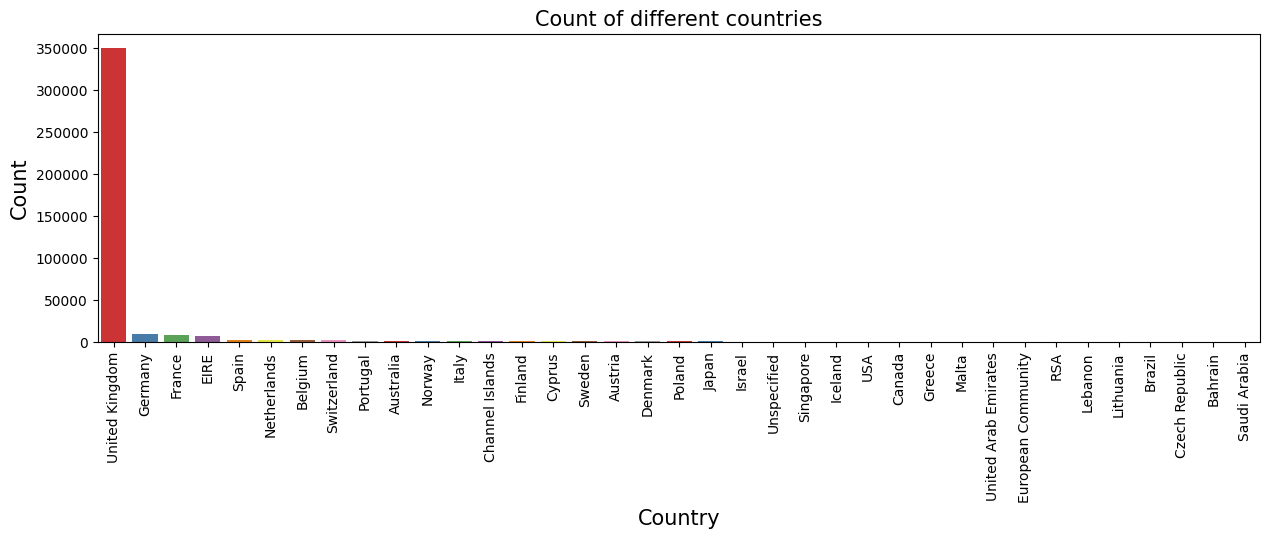

In [420]:
plt.figure(figsize=(15,4))
sns.barplot(x=df.Country.value_counts().index, y=df.Country.value_counts().values, palette="Set1")
plt.xticks(rotation=90)
plt.xlabel("Country", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of different countries", fontsize=15)

In [421]:
# from the plot it is clear that the UK dominates the market
# let's see the count of other countries

In [422]:
abroad = df.loc[df.Country!="United Kingdom"]
abroad.Country.value_counts()

Germany                 9025
France                  8326
EIRE                    7226
Spain                   2479
Netherlands             2359
Belgium                 2031
Switzerland             1841
Portugal                1453
Australia               1181
Norway                  1071
Italy                    758
Channel Islands          747
Finland                  685
Cyprus                   603
Sweden                   450
Austria                  398
Denmark                  380
Poland                   330
Japan                    321
Israel                   245
Unspecified              241
Singapore                222
Iceland                  182
USA                      179
Canada                   151
Greece                   145
Malta                    112
United Arab Emirates      68
European Community        60
RSA                       57
Lebanon                   45
Lithuania                 35
Brazil                    32
Czech Republic            25
Bahrain       

Text(0.5, 1.0, 'Count of different countries excluding the UK')

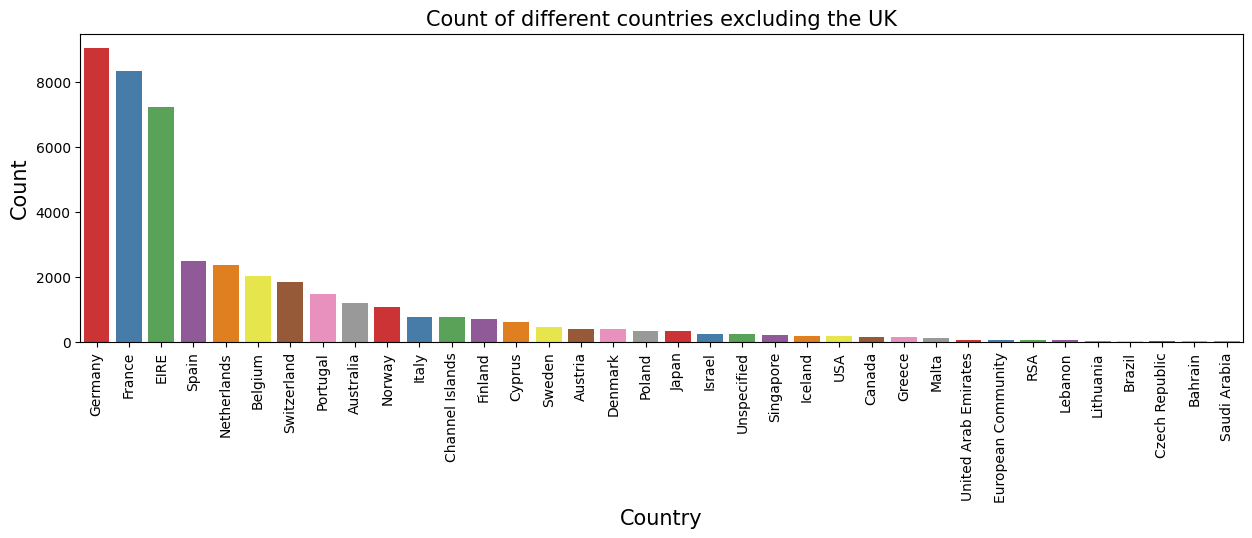

In [423]:
plt.figure(figsize=(15,4))
sns.barplot(x=abroad.Country.value_counts().index,y=abroad.Country.value_counts().values, palette="Set1")
plt.xticks(rotation=90)
plt.xlabel("Country", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of different countries excluding the UK", fontsize=15)

In [424]:
# for doing further analysis , it better to split the data into 2 datas --> uk and abroad
# else the results of all the analysis would be skewed

In [425]:
uk = df.loc[df.Country=="United Kingdom"]
uk.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [426]:
uk.shape, abroad.shape
# divided into 2 dataframes

((349203, 8), (43489, 8))

In [427]:
uk_freq = uk.Description.value_counts()
uk_freq

WHITE HANGING HEART T-LIGHT HOLDER    1929
JUMBO BAG RED RETROSPOT               1461
REGENCY CAKESTAND 3 TIER              1417
ASSORTED COLOUR BIRD ORNAMENT         1320
PARTY BUNTING                         1300
                                      ... 
GLASS BEAD HOOP EARRINGS AMETHYST        1
ROBIN CHRISTMAS CARD                     1
TEA TIME BREAKFAST BASKET                1
PURPLE FRANGIPANI HAIRCLIP               1
PAPER CRAFT , LITTLE BIRDIE              1
Name: Description, Length: 3844, dtype: int64

Text(0.5, 1.0, 'Top 30 frequently bought items in the UK')

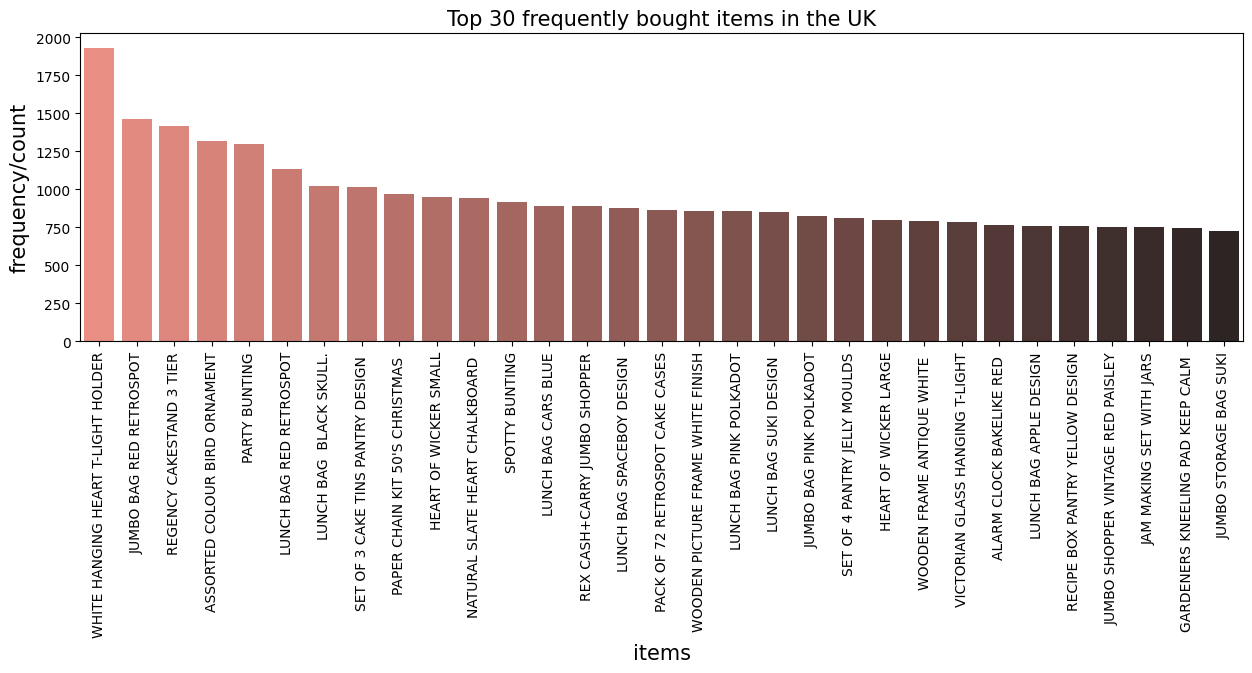

In [428]:
plt.figure(figsize=(15,4))
sns.barplot(x=uk_freq.index[:31],y=uk_freq.values[:31], palette="dark:salmon_r")
plt.xticks(rotation=90)
plt.xlabel("items", fontsize=15)
plt.ylabel("frequency/count", fontsize=15)
plt.title("Top 30 frequently bought items in the UK", fontsize=15)

In [429]:
uk_freq.tail()

GLASS BEAD HOOP EARRINGS AMETHYST    1
ROBIN CHRISTMAS CARD                 1
TEA TIME BREAKFAST BASKET            1
PURPLE FRANGIPANI HAIRCLIP           1
PAPER CRAFT , LITTLE BIRDIE          1
Name: Description, dtype: int64

Text(0.5, 1.0, 'Least purchased items in the UK')

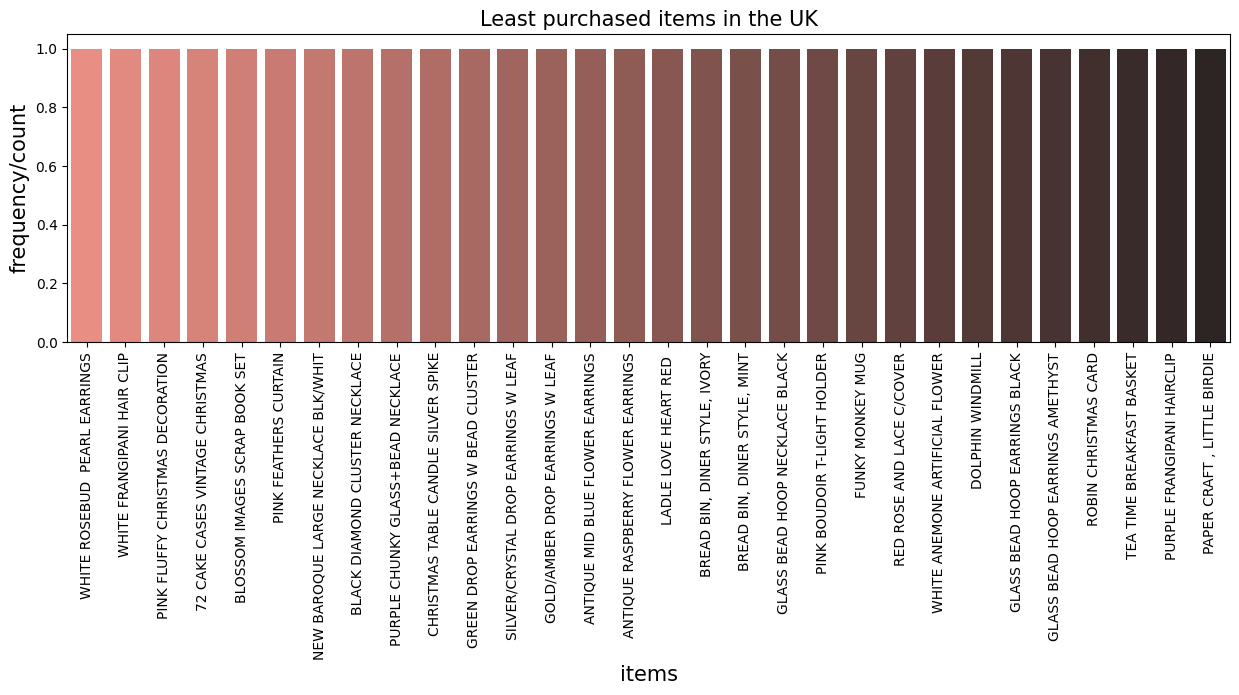

In [430]:
plt.figure(figsize=(15,4))
sns.barplot(x=uk_freq.tail(30).index,y=uk_freq.tail(30).values, palette="dark:salmon_r")
plt.xticks(rotation=90)
plt.xlabel("items", fontsize=15)
plt.ylabel("frequency/count", fontsize=15)
plt.title("Least purchased items in the UK", fontsize=15)

In [431]:
abroad.Description.value_counts()

POSTAGE                                1072
ROUND SNACK BOXES SET OF4 WOODLAND      300
REGENCY CAKESTAND 3 TIER                296
PLASTERS IN TIN WOODLAND ANIMALS        212
PLASTERS IN TIN CIRCUS PARADE           201
                                       ... 
LARGE ZINC HEART WALL ORGANISER           1
HOT WATER BOTTLE BABUSHKA LARGE           1
WHITE TRAVEL ALARM CLOCK                  1
PINK B'FLY C/COVER W BOBBLES              1
WALL ART DOG AND BALL                     1
Name: Description, Length: 2890, dtype: int64

Text(0.5, 1.0, 'Top 30 frequently bought items outside the UK')

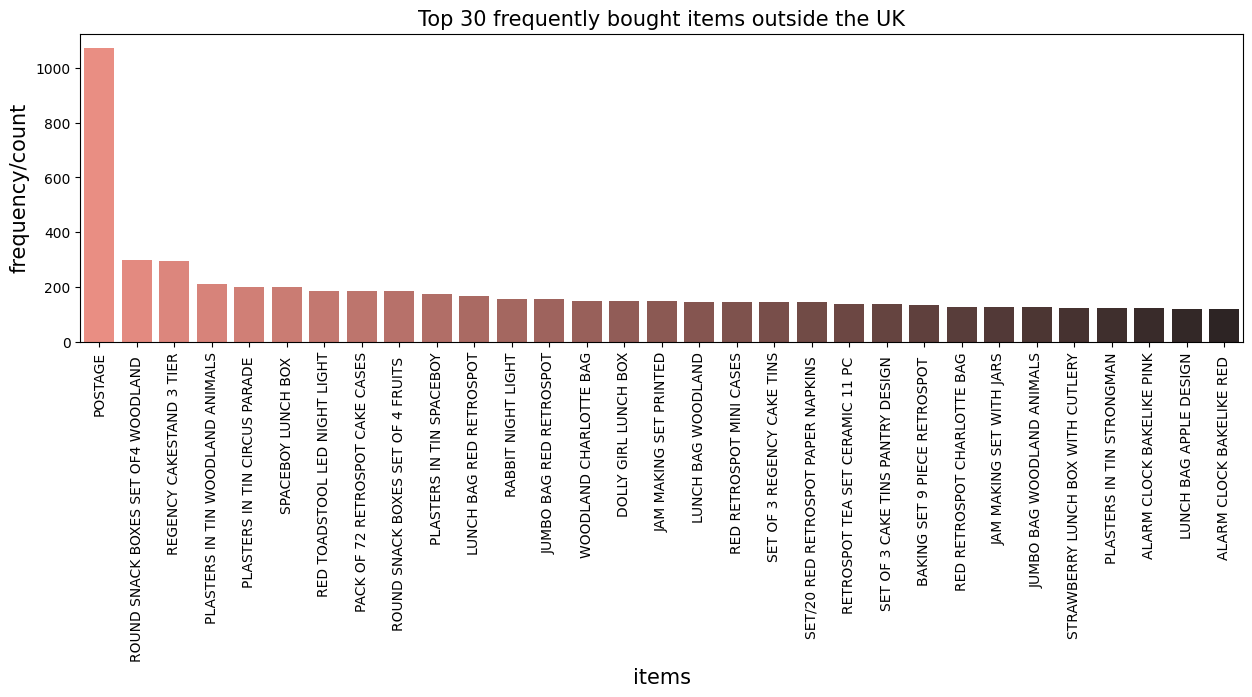

In [432]:
plt.figure(figsize=(15,4))
sns.barplot(x=abroad.Description.value_counts().index[:31],y=abroad.Description.value_counts().values[:31], palette="dark:salmon_r")
plt.xticks(rotation=90)
plt.xlabel("items", fontsize=15)
plt.ylabel("frequency/count", fontsize=15)
plt.title("Top 30 frequently bought items outside the UK", fontsize=15)

Text(0.5, 1.0, 'Least Purchased items outside the UK')

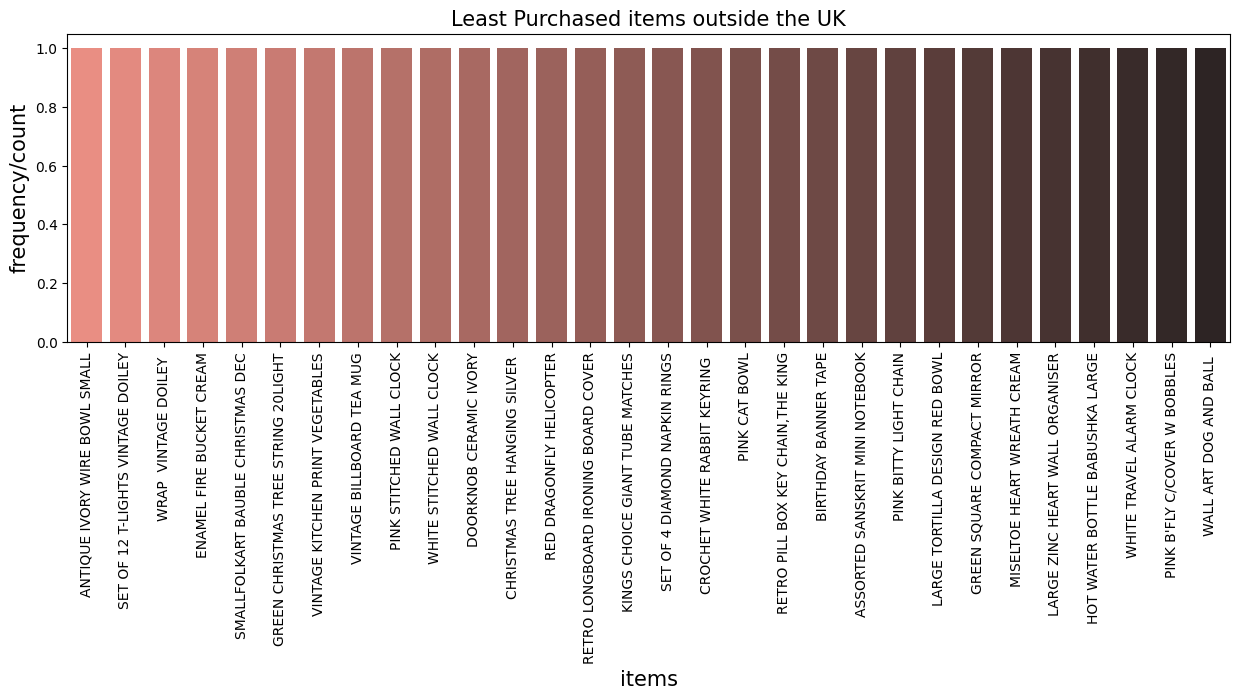

In [433]:
plt.figure(figsize=(15,4))
sns.barplot(x=abroad.Description.value_counts().tail(30).index,y=abroad.Description.value_counts().tail(30).values, palette="dark:salmon_r")
plt.xticks(rotation=90)
plt.xlabel("items", fontsize=15)
plt.ylabel("frequency/count", fontsize=15)
plt.title("Least Purchased items outside the UK", fontsize=15)

In [434]:
# WALL ART DOG AND BALL is the least purchased item

In [435]:
# in the uk, the most popular item is WHITE HANGING HEART T-LIGHT HOLDER with 1929 quantities being purchased whereas in abroad,
# the most frequently bought item is POSTAGE followed by ROUND SNACK BOXES SET OF4 WOODLAND

In [436]:
# now let's for which item has been ordered in bulk quantities

In [437]:
uk.groupby("Description")["Quantity"].sum().sort_values(ascending=False).reset_index()

Description  Quantity
0             PAPER CRAFT , LITTLE BIRDIE     80995
1          MEDIUM CERAMIC TOP STORAGE JAR     76919
2       WORLD WAR 2 GLIDERS ASSTD DESIGNS     49086
3                 JUMBO BAG RED RETROSPOT     41878
4      WHITE HANGING HEART T-LIGHT HOLDER     34630
...                                   ...       ...
3839      PINK CRYSTAL GUITAR PHONE CHARM         1
3840               PINK POLKADOT KIDS BAG         1
3841  SET/3 TALL GLASS CANDLE HOLDER PINK         1
3842   TURQ PENDANT TRIPLE SHELL NECKLACE         1
3843      SILVER AND BLACK ORBIT NECKLACE         1

[3844 rows x 2 columns]

In [438]:
uk.loc[uk.Description=="PAPER CRAFT , LITTLE BIRDIE"]

InvoiceNo StockCode                  Description  Quantity  \
540421    581483     23843  PAPER CRAFT , LITTLE BIRDIE     80995   

               InvoiceDate  UnitPrice  CustomerID         Country  
540421 2011-12-09 09:15:00       2.08     16446.0  United Kingdom

In [439]:
# in the uk PAPER CRAFT , LITTLE BIRDIE	has been ordered in bulk quantities within a single invoice(invoice no 581483)
# ordering 80995 quantities of the same at a single time

# this is quite interesting because in the uk, the least purchased items as seen above is PAPER CRAFT , LITTLE BIRDIE
# but somebody has ordered it in a bulk quantity even though it being the least popular item(might be some sort of business or so)

In [440]:
abroad.groupby("Description")["Quantity"].sum().sort_values(ascending=False).reset_index()

Description  Quantity
0                    RABBIT NIGHT LIGHT     15437
1               MINI PAINT SET VINTAGE      12493
2       PACK OF 72 RETROSPOT CAKE CASES     11228
3                   SPACEBOY LUNCH BOX       8363
4                  DOLLY GIRL LUNCH BOX      7344
...                                 ...       ...
2885  SET OF 12 T-LIGHTS VINTAGE DOILEY         1
2886                       CHAMBRE HOOK         1
2887       CAST IRON HOOK GARDEN TROWEL         1
2888      SET OF 4 DIAMOND NAPKIN RINGS         1
2889        MIXED NUTS LIGHT GREEN BOWL         1

[2890 rows x 2 columns]

In [441]:
abroad.loc[abroad.Description=="RABBIT NIGHT LIGHT"]
# outside of the uk, RABBIT NIGHT LIGHT is the item which is ordered in bulk

InvoiceNo StockCode         Description  Quantity         InvoiceDate  \
186074    552844     23084  RABBIT NIGHT LIGHT        18 2011-05-11 14:37:00   
186108    552851     23084  RABBIT NIGHT LIGHT       120 2011-05-11 15:07:00   
186645    552875     23084  RABBIT NIGHT LIGHT        48 2011-05-12 09:41:00   
186763    552882     23084  RABBIT NIGHT LIGHT        24 2011-05-12 10:10:00   
187252    552956     23084  RABBIT NIGHT LIGHT        12 2011-05-12 12:34:00   
...          ...       ...                 ...       ...                 ...   
534804    581171     23084  RABBIT NIGHT LIGHT        24 2011-12-07 15:02:00   
534952    581175     23084  RABBIT NIGHT LIGHT      1440 2011-12-07 15:16:00   
535002    581179     23084  RABBIT NIGHT LIGHT        24 2011-12-07 15:43:00   
535009    581180     23084  RABBIT NIGHT LIGHT        24 2011-12-07 15:52:00   
541199    581494     23084  RABBIT NIGHT LIGHT        24 2011-12-09 10:13:00   

        UnitPrice  CustomerID      Country  
186074       2.08     12649.0      Germany  
186108       1.79     12731.0       France  
186645       1.79     12621.0      Germany  
186763       2.08     14646.0  Netherlands  
187252       2.08     12431.0    Australia  
...           ...         ...          ...  
534804       1.79     12615.0       France  
534952       1.79     14646.0  Netherlands  
535002       1.79     12471.0      Germany  
535009       1.79     12347.0      Iceland  
541199       1.79     12518.0      Germany  

[157 rows x 8 columns]

Text(0.5, 1.0, 'Most frequently purchased stock codes in the UK')

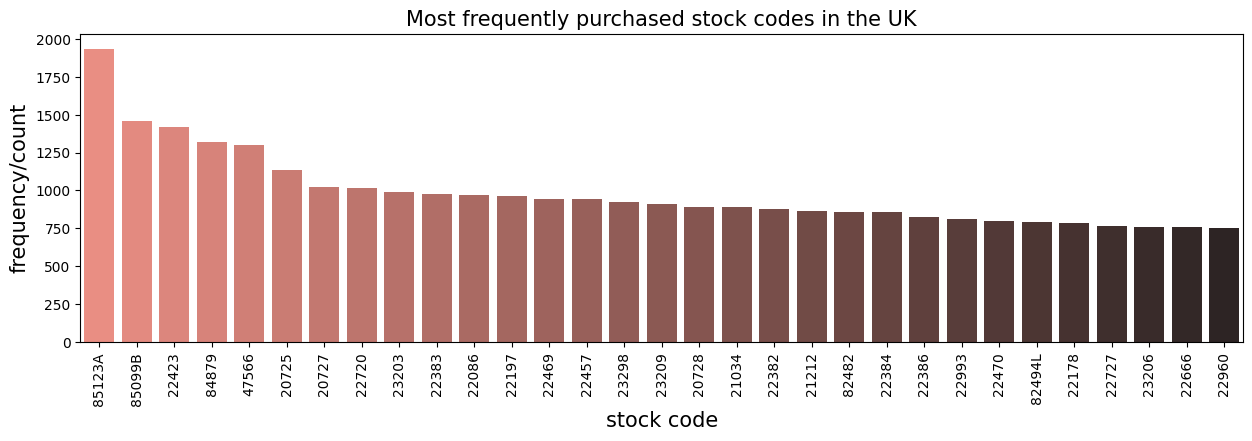

In [442]:
plt.figure(figsize=(15,4))
sns.barplot(x=uk.StockCode.value_counts().index[:31],y=uk.StockCode.value_counts().values[:31], palette="dark:salmon_r")
plt.xticks(rotation=90)
plt.xlabel("stock code", fontsize=15)
plt.ylabel("frequency/count", fontsize=15)
plt.title("Most frequently purchased stock codes in the UK", fontsize=15)

In [443]:
# 85123A (WHITE HANGING HEART T-LIGHT HOLDER) is the most frequently purchased stock codes in the UK

Text(0.5, 1.0, 'Most frequently purchased stock codes abroad')

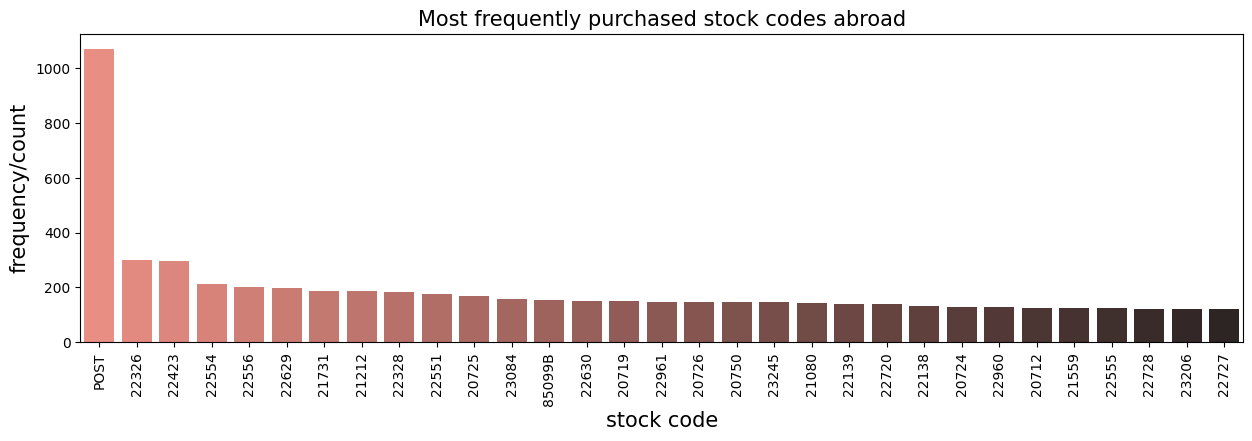

In [444]:
plt.figure(figsize=(15,4))
sns.barplot(x=abroad.StockCode.value_counts().index[:31],y=abroad.StockCode.value_counts().values[:31], palette="dark:salmon_r")
plt.xticks(rotation=90)
plt.xlabel("stock code", fontsize=15)
plt.ylabel("frequency/count", fontsize=15)
plt.title("Most frequently purchased stock codes abroad", fontsize=15)

In [445]:
# POST (POSTAGE)  is the most frequently purchased stock code abroad

In [446]:
# lets see which invoice has the most items
inv_uk = uk.groupby("InvoiceNo")["Quantity"].count().sort_values(ascending=False).reset_index()
inv_uk

InvoiceNo  Quantity
0        576339       542
1        579196       533
2        580727       529
3        578270       442
4        573576       435
...         ...       ...
16641    562098         1
16642    579015         1
16643    562050         1
16644    548985         1
16645    559677         1

[16646 rows x 2 columns]

In [447]:
uk[uk.InvoiceNo == "576339"]
# invoice no 576339 has the most number of items in it 542 items

InvoiceNo StockCode                      Description  Quantity  \
466895    576339     10135     COLOURING PENCILS BROWN TUBE        14   
466896    576339    15044A              PINK PAPER PARASOL          1   
466897    576339     16238        PARTY TIME PENCIL ERASERS         2   
466898    576339    16258A   SWIRLY CIRCULAR RUBBERS IN BAG         1   
466899    576339     17003              BROCADE RING PURSE          2   
...          ...       ...                              ...       ...   
467432    576339     90083  CRYSTAL CZECH CROSS PHONE CHARM         1   
467433    576339     90086         CRYSTAL FROG PHONE CHARM         1   
467434    576339     90119        METALIC LEAVES BAG CHARMS        11   
467435    576339     90166        PINK & WHITE ROSEBUD RING         1   
467436    576339       DOT                   DOTCOM POSTAGE         1   

               InvoiceDate  UnitPrice  CustomerID         Country  
466895 2011-11-14 15:27:00       2.46     14096.0  United Kingdom  
466896 2011-11-14 15:27:00       5.79     14096.0  United Kingdom  
466897 2011-11-14 15:27:00       0.42     14096.0  United Kingdom  
466898 2011-11-14 15:27:00       0.83     14096.0  United Kingdom  
466899 2011-11-14 15:27:00       0.63     14096.0  United Kingdom  
...                    ...        ...         ...             ...  
467432 2011-11-14 15:27:00       1.63     14096.0  United Kingdom  
467433 2011-11-14 15:27:00       1.63     14096.0  United Kingdom  
467434 2011-11-14 15:27:00       2.46     14096.0  United Kingdom  
467435 2011-11-14 15:27:00       4.15     14096.0  United Kingdom  
467436 2011-11-14 15:27:00    1500.36     14096.0  United Kingdom  

[542 rows x 8 columns]

Text(0.5, 1.0, 'Invoices with most number of items in the UK')

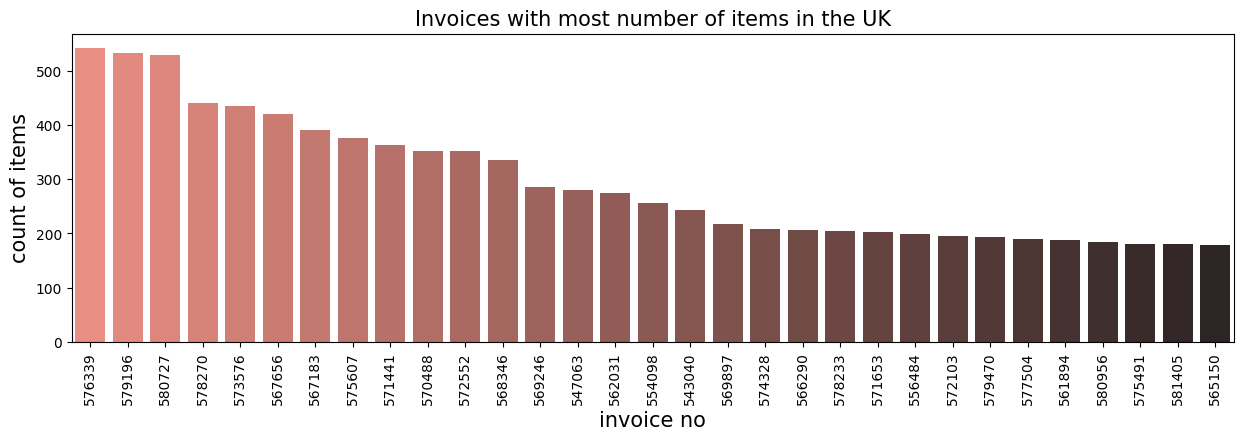

In [448]:
plt.figure(figsize=(15,4))
sns.barplot(x=inv_uk.InvoiceNo[:31],y=inv_uk.Quantity[:31], palette="dark:salmon_r")
plt.xticks(rotation=90)
plt.xlabel("invoice no", fontsize=15)
plt.ylabel("count of items", fontsize=15)
plt.title("Invoices with most number of items in the UK", fontsize=15)

In [449]:
inv_ab = abroad.groupby("InvoiceNo")["Quantity"].count().sort_values(ascending=False).reset_index()
inv_ab

# invoice no 570672 has the most items(259) in it

InvoiceNo  Quantity
0       570672       259
1       562046       219
2       569866       175
3       563613       171
4       540458       149
...        ...       ...
1881    538175         1
1882    569639         1
1883    569557         1
1884    540557         1
1885    577607         1

[1886 rows x 2 columns]

Text(0.5, 1.0, 'Invoices with most number of items outside UK')

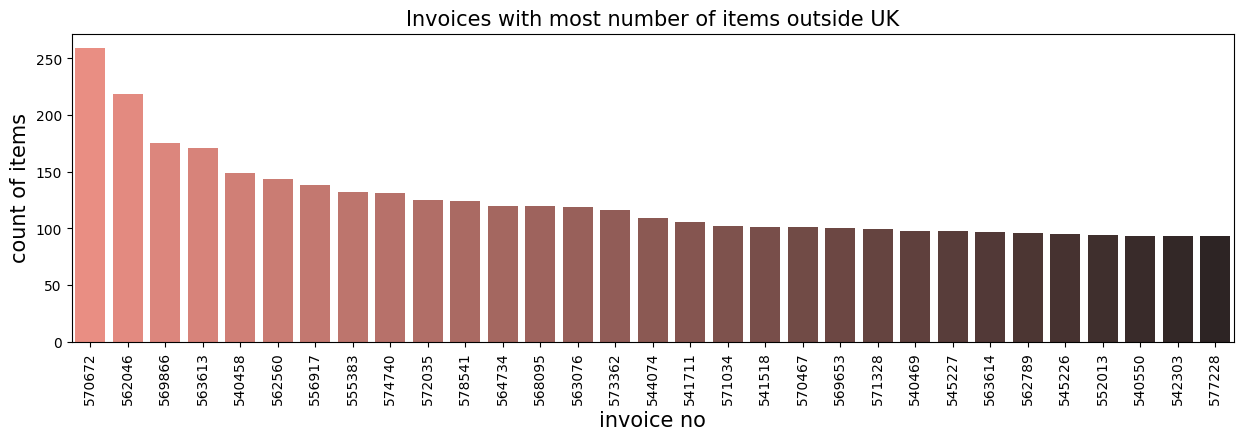

In [450]:
plt.figure(figsize=(15,4))
sns.barplot(x=inv_ab.InvoiceNo[:31],y=inv_ab.Quantity[:31], palette="dark:salmon_r")
plt.xticks(rotation=90)
plt.xlabel("invoice no", fontsize=15)
plt.ylabel("count of items", fontsize=15)
plt.title("Invoices with most number of items outside UK", fontsize=15)

In [451]:
# which customer buys the most in the uk
uk.groupby("CustomerID")["Quantity"].count().sort_values(ascending=False).reset_index()
# customer with ID = 17841 has purchased the most items in the UK (frequent/valuable customer)

CustomerID  Quantity
0        17841.0      7676
1        14096.0      5111
2        12748.0      4412
3        14606.0      2677
4        15311.0      2366
...          ...       ...
3915     17347.0         1
3916     15316.0         1
3917     15313.0         1
3918     13270.0         1
3919     12346.0         1

[3920 rows x 2 columns]

In [452]:
uk.loc[uk.CustomerID == 17841]

InvoiceNo StockCode                      Description  Quantity  \
2037      536557     21495       SKULLS AND CROSSBONES WRAP        25   
2038      536557    46000R     POLYESTER FILLER PAD 45x30cm         2   
2039      536557    46000S     POLYESTER FILLER PAD 40x40cm         1   
2040      536557     22731    3D CHRISTMAS STAMPS STICKERS          1   
2041      536557     21258       VICTORIAN SEWING BOX LARGE         1   
...          ...       ...                              ...       ...   
537748    581334     22077           6 RIBBONS RUSTIC CHARM         1   
537749    581334     23399    HOME SWEET HOME HANGING HEART         3   
537750    581334     22893   MINI CAKE STAND T-LIGHT HOLDER        12   
537751    581334     22371     AIRLINE BAG VINTAGE TOKYO 78         1   
537753    581334     21926  RED/CREAM STRIPE CUSHION COVER          8   

               InvoiceDate  UnitPrice  CustomerID         Country  
2037   2010-12-01 14:41:00       0.42     17841.0  United Kingdom  
2038   2010-12-01 14:41:00       1.45     17841.0  United Kingdom  
2039   2010-12-01 14:41:00       1.45     17841.0  United Kingdom  
2040   2010-12-01 14:41:00       1.25     17841.0  United Kingdom  
2041   2010-12-01 14:41:00      12.75     17841.0  United Kingdom  
...                    ...        ...         ...             ...  
537748 2011-12-08 12:07:00       1.95     17841.0  United Kingdom  
537749 2011-12-08 12:07:00       0.85     17841.0  United Kingdom  
537750 2011-12-08 12:07:00       0.42     17841.0  United Kingdom  
537751 2011-12-08 12:07:00       4.25     17841.0  United Kingdom  
537753 2011-12-08 12:07:00       1.25     17841.0  United Kingdom  

[7676 rows x 8 columns]

In [453]:
abroad.groupby("CustomerID")["Quantity"].count().sort_values(ascending=False).reset_index()
# the customer with CustomerID == 14911 is a valuable customer abroad

CustomerID  Quantity
0       14911.0      5670
1       14646.0      2076
2       14156.0      1395
3       12415.0       714
4       12681.0       638
..          ...       ...
413     12665.0         3
414     12791.0         2
415     12603.0         2
416     12814.0         2
417     17443.0         1

[418 rows x 2 columns]

In [454]:
abroad[abroad.CustomerID == 14911.0]
# and the order is from EIRE

InvoiceNo StockCode                          Description  Quantity  \
1404      536540     22968           ROSE COTTAGE KEEPSAKE BOX          4   
1405      536540    85071A  BLUE CHARLIE+LOLA PERSONAL DOORSIGN         6   
1406      536540    85071C    CHARLIE+LOLA"EXTREMELY BUSY" SIGN         6   
1407      536540     22355            CHARLOTTE BAG SUKI DESIGN        50   
1408      536540     21579      LOLITA  DESIGN  COTTON TOTE BAG         6   
...          ...       ...                                  ...       ...   
539151    581433     22192                BLUE DINER WALL CLOCK         2   
539152    581433     48187                  DOORMAT NEW ENGLAND         2   
539153    581433     48184                DOORMAT ENGLISH ROSE          2   
539154    581433     20685                DOORMAT RED RETROSPOT         2   
539155    581433    79302M               ART LIGHTS,FUNK MONKEY         6   

               InvoiceDate  UnitPrice  CustomerID Country  
1404   2010-12-01 14:05:00       9.95     14911.0    EIRE  
1405   2010-12-01 14:05:00       2.95     14911.0    EIRE  
1406   2010-12-01 14:05:00       2.55     14911.0    EIRE  
1407   2010-12-01 14:05:00       0.85     14911.0    EIRE  
1408   2010-12-01 14:05:00       2.25     14911.0    EIRE  
...                    ...        ...         ...     ...  
539151 2011-12-08 15:54:00       8.50     14911.0    EIRE  
539152 2011-12-08 15:54:00       8.25     14911.0    EIRE  
539153 2011-12-08 15:54:00       8.25     14911.0    EIRE  
539154 2011-12-08 15:54:00       8.25     14911.0    EIRE  
539155 2011-12-08 15:54:00       2.95     14911.0    EIRE  

[5670 rows x 8 columns]

<Axes: >

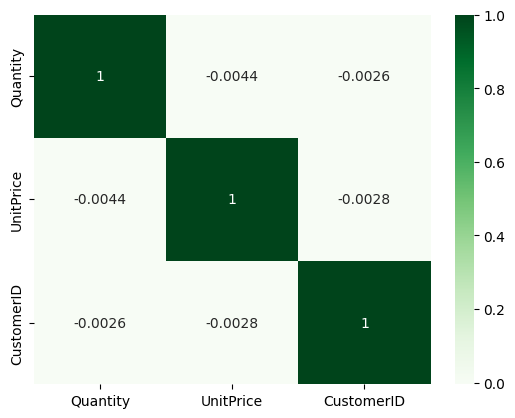

In [455]:
sns.heatmap(uk.corr(), annot=True, cmap="Greens")
# there is no correlation between any of these columns

In [456]:
df["Total_sales"] = df.Quantity*df.UnitPrice
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Total_sales  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom        15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom        22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34

In [457]:
uk["Total_sales"] = uk.Quantity*uk.UnitPrice
uk.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Total_sales  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom        15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom        22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34

In [458]:
abroad["Total_sales"] = abroad.Quantity*abroad.UnitPrice
abroad.head()

InvoiceNo StockCode                      Description  Quantity  \
26    536370     22728        ALARM CLOCK BAKELIKE PINK        24   
27    536370     22727        ALARM CLOCK BAKELIKE RED         24   
28    536370     22726       ALARM CLOCK BAKELIKE GREEN        12   
29    536370     21724  PANDA AND BUNNIES STICKER SHEET        12   
30    536370     21883                 STARS GIFT TAPE         24   

           InvoiceDate  UnitPrice  CustomerID Country  Total_sales  
26 2010-12-01 08:45:00       3.75     12583.0  France         90.0  
27 2010-12-01 08:45:00       3.75     12583.0  France         90.0  
28 2010-12-01 08:45:00       3.75     12583.0  France         45.0  
29 2010-12-01 08:45:00       0.85     12583.0  France         10.2  
30 2010-12-01 08:45:00       0.65     12583.0  France         15.6

In [459]:
tot = sum(df.Total_sales)
tot

8887208.894003171

In [460]:
uk_sales = sum(uk.Total_sales)
uk_sales

7285024.644002949

In [461]:
ab_sales = sum(abroad.Total_sales)
ab_sales

1602184.2500000102

In [462]:
(uk_sales/tot ) * 100, (ab_sales/tot ) * 100

(81.97201990963295, 18.02798009036467)

In [463]:
# uk contributes 82% to the total sales whereas all other countries combined contributes just 18% to the total sales
# ie, the uk clearly dominates the market

In [464]:
# let see the trend

In [465]:
uk_ts = uk[["InvoiceDate", "Total_sales"]]
uk_ts.set_index("InvoiceDate", inplace=True)
uk_ts

Total_sales
InvoiceDate                     
2010-12-01 08:26:00        15.30
2010-12-01 08:26:00        20.34
2010-12-01 08:26:00        22.00
2010-12-01 08:26:00        20.34
2010-12-01 08:26:00        20.34
...                          ...
2011-12-09 12:31:00        23.40
2011-12-09 12:49:00        23.60
2011-12-09 12:49:00        30.00
2011-12-09 12:49:00       214.80
2011-12-09 12:49:00        70.80

[349203 rows x 1 columns]

In [466]:
uk_re = uk_ts.resample("W").sum()
uk_re

Total_sales
InvoiceDate             
2010-12-05    133299.640
2010-12-12    186269.750
2010-12-19    146442.720
2010-12-26     30465.230
2011-01-02         0.000
2011-01-09     97092.610
2011-01-16    109051.030
2011-01-23    141844.530
2011-01-30     80140.390
2011-02-06     89818.020
2011-02-13     73332.500
2011-02-20     93296.980
2011-02-27     98724.680
2011-03-06     81302.540
2011-03-13     92489.320
2011-03-20    112784.110
2011-03-27    111879.540
2011-04-03    108386.280
2011-04-10     92196.470
2011-04-17    122356.561
2011-04-24    103948.620
2011-05-01     67231.430
2011-05-08    114498.450
2011-05-15    131919.960
2011-05-22    162885.350
2011-05-29    120875.770
2011-06-05     81942.360
2011-06-12    168879.090
2011-06-19    120559.820
2011-06-26     90568.240
2011-07-03     91583.050
2011-07-10    114038.240
2011-07-17     97029.710
2011-07-24    133846.410
2011-07-31    124190.301
2011-08-07    132922.730
2011-08-14     97544.250
2011-08-21    124974.660
2011-08-28    121014.340
2011-09-04     89386.440
2011-09-11    130517.640
2011-09-18    187485.400
2011-09-25    249085.341
2011-10-02    170550.781
2011-10-09    252863.620
2011-10-16    160801.760
2011-10-23    178420.000
2011-10-30    188805.550
2011-11-06    225556.880
2011-11-13    228369.690
2011-11-20    220386.260
2011-11-27    209506.710
2011-12-04    219258.810
2011-12-11    372404.080

Text(0.5, 1.0, 'Weekly trend of sales in the UK')

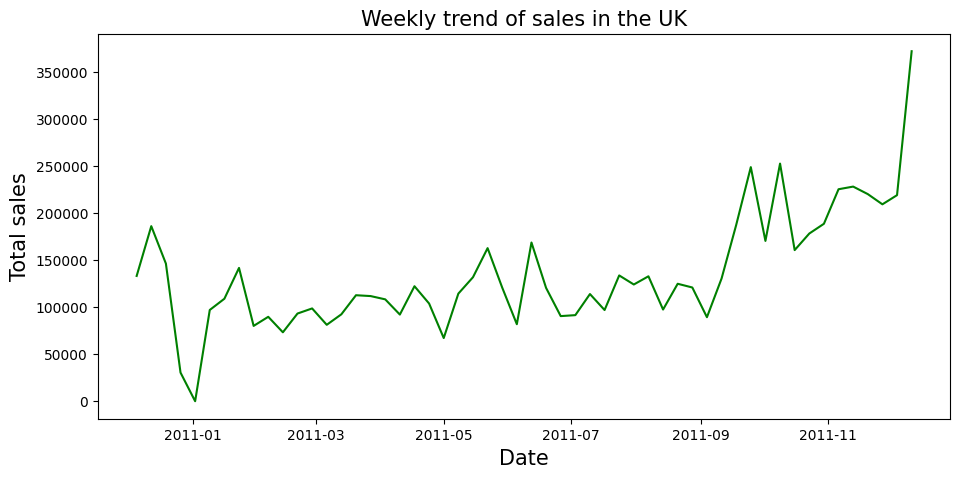

In [467]:
plt.figure(figsize=(11,5))
sns.lineplot(x=uk_re.index, y=uk_re.Total_sales, color='g')
plt.xlabel("Date", fontsize=15)
plt.ylabel("Total sales", fontsize=15)
plt.title("Weekly trend of sales in the UK", fontsize=15)

In [468]:
# the sales increases towards the end of the year
# zero sales are seen in on Jan 2. It is clear from the graph as well as from the table
# the store might be closed following new year
uk_re[4:5]

Total_sales
InvoiceDate             
2011-01-02           0.0

In [469]:
# let see if this happens in other countries as well

In [470]:
ab_ts = abroad[["InvoiceDate", "Total_sales"]]
ab_ts.set_index("InvoiceDate", inplace=True)
ab_ts

Total_sales
InvoiceDate                     
2010-12-01 08:45:00        90.00
2010-12-01 08:45:00        90.00
2010-12-01 08:45:00        45.00
2010-12-01 08:45:00        10.20
2010-12-01 08:45:00        15.60
...                          ...
2011-12-09 12:50:00        10.20
2011-12-09 12:50:00        12.60
2011-12-09 12:50:00        16.60
2011-12-09 12:50:00        16.60
2011-12-09 12:50:00        14.85

[43489 rows x 1 columns]

In [471]:
ab_re = ab_ts.resample("W").sum()
ab_re

Total_sales
InvoiceDate             
2010-12-05      15328.33
2010-12-12      26349.38
2010-12-19      16673.40
2010-12-26      15594.28
2011-01-02          0.00
2011-01-09      17544.19
2011-01-16      45293.82
2011-01-23      33607.70
2011-01-30      24720.61
2011-02-06      16137.79
2011-02-13      14495.44
2011-02-20      32403.17
2011-02-27      31656.09
2011-03-06      36084.28
2011-03-13      19704.61
2011-03-20      24885.71
2011-03-27      17681.18
2011-04-03      35271.30
2011-04-10      27501.26
2011-04-17      12574.26
2011-04-24      12020.78
2011-05-01       6142.63
2011-05-08      16595.67
2011-05-15      46654.36
2011-05-22      32933.44
2011-05-29      25900.84
2011-06-05      20098.01
2011-06-12      24825.03
2011-06-19      51142.62
2011-06-26      22032.43
2011-07-03      24667.77
2011-07-10      17184.28
2011-07-17      21049.02
2011-07-24      33438.03
2011-07-31      40067.74
2011-08-07      23020.27
2011-08-14      46000.37
2011-08-21      42659.74
2011-08-28      26581.62
2011-09-04      24439.53
2011-09-11      35694.82
2011-09-18      21233.48
2011-09-25      60006.16
2011-10-02      23103.65
2011-10-09      43350.62
2011-10-16      42907.19
2011-10-23      76355.57
2011-10-30      47651.29
2011-11-06      33817.14
2011-11-13      35347.64
2011-11-20      55830.72
2011-11-27      38727.87
2011-12-04      31574.23
2011-12-11      35622.89

Text(0.5, 1.0, 'Weekly trend of sales abroad')

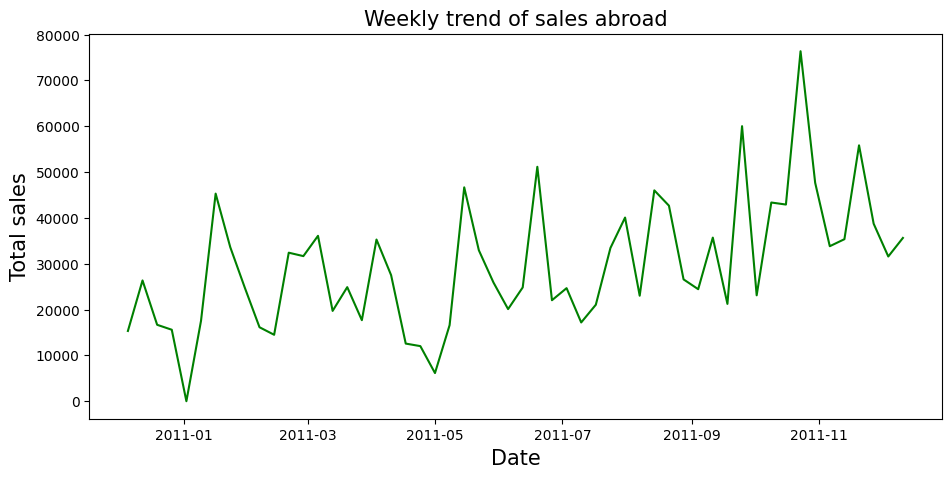

In [472]:
plt.figure(figsize=(11,5))
sns.lineplot(x=ab_re.index, y=ab_re.Total_sales, color='g')
plt.xlabel("Date", fontsize=15)
plt.ylabel("Total sales", fontsize=15)
plt.title("Weekly trend of sales abroad", fontsize=15)

In [473]:
# here also zero sales are seen on Jan-2
ab_re[4:5]

Total_sales
InvoiceDate             
2011-01-02           0.0

Text(0.5, 1.0, 'Monthly trend of sales in the UK')

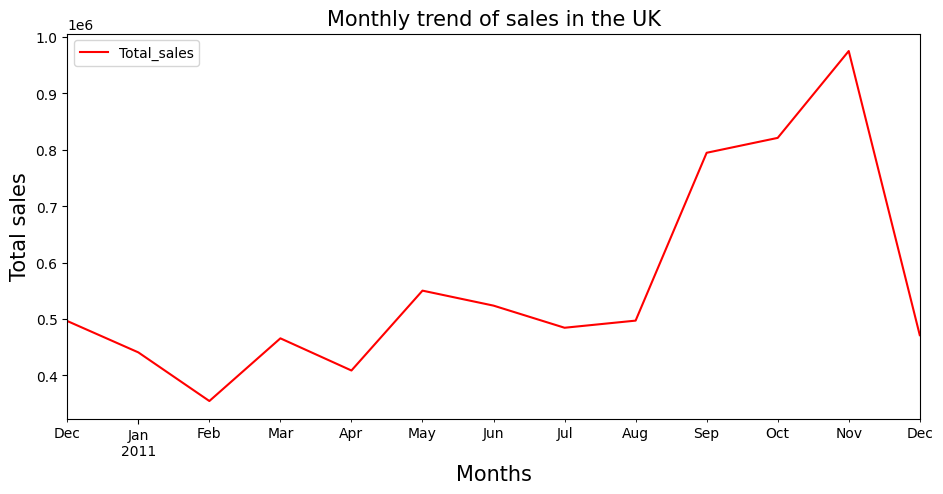

In [474]:
uk_ts.resample('M').sum().plot(figsize=(11,5), color="r")
plt.xlabel("Months", fontsize=15)
plt.ylabel("Total sales", fontsize=15)
plt.title("Monthly trend of sales in the UK", fontsize=15)

Text(0.5, 1.0, 'Monthly trend of sales abroad')

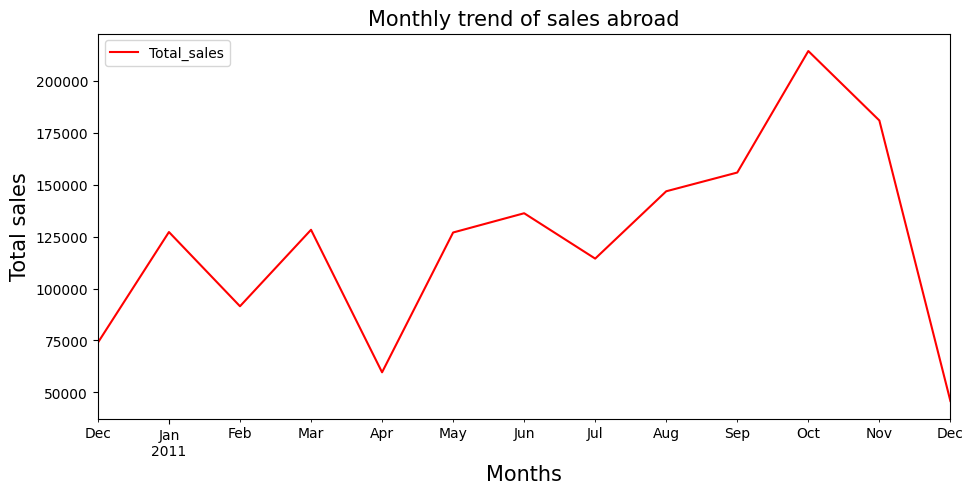

In [475]:
ab_ts.resample('M').sum().plot(figsize=(11,5), color="r")
plt.xlabel("Months", fontsize=15)
plt.ylabel("Total sales", fontsize=15)
plt.title("Monthly trend of sales abroad", fontsize=15)

In [476]:
# in both the plots, monthly sales are higher in Oct, Nov.
# During Dec, it again falls down.

In [477]:
# ASSOCIATION RULE MINING

In [478]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [479]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [480]:
uk.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Total_sales  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom        15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom        22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34

In [481]:
basket_uk = uk.groupby(["InvoiceNo", "Description"])["Quantity"].sum().unstack().fillna(0)
basket_uk

Description   4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
InvoiceNo                                                                     
536365                                  0.0                             0.0   
536366                                  0.0                             0.0   
536367                                  0.0                             0.0   
536368                                  0.0                             0.0   
536369                                  0.0                             0.0   
...                                     ...                             ...   
581582                                  0.0                             0.0   
581583                                  0.0                             0.0   
581584                                  0.0                             0.0   
581585                                  0.0                             0.0   
581586                                  0.0                             0.0   

Description   DOLLY GIRL BEAKER   I LOVE LONDON MINI BACKPACK  \
InvoiceNo                                                       
536365                      0.0                           0.0   
536366                      0.0                           0.0   
536367                      0.0                           0.0   
536368                      0.0                           0.0   
536369                      0.0                           0.0   
...                         ...                           ...   
581582                      0.0                           0.0   
581583                      0.0                           0.0   
581584                      0.0                           0.0   
581585                      0.0                           0.0   
581586                      0.0                           0.0   

Description   NINE DRAWER OFFICE TIDY   OVAL WALL MIRROR DIAMANTE   \
InvoiceNo                                                            
536365                            0.0                          0.0   
536366                            0.0                          0.0   
536367                            0.0                          0.0   
536368                            0.0                          0.0   
536369                            0.0                          0.0   
...                               ...                          ...   
581582                            0.0                          0.0   
581583                            0.0                          0.0   
581584                            0.0                          0.0   
581585                            0.0                          0.0   
581586                            0.0                          0.0   

Description   RED SPOT GIFT BAG LARGE   SET 2 TEA TOWELS I LOVE LONDON   \
InvoiceNo                                                                 
536365                            0.0                               0.0   
536366                            0.0                               0.0   
536367                            0.0                               0.0   
536368                            0.0                               0.0   
536369                            0.0                               0.0   
...                               ...                               ...   
581582                            0.0                               0.0   
581583                            0.0                               0.0   
581584                            0.0                               0.0   
581585                            0.0                               0.0   
581586                            0.0                               0.0   

Description   SPACEBOY BABY GIFT SET   TOADSTOOL BEDSIDE LIGHT   ...  \
InvoiceNo                                                        ...   
536365                           0.0                        0.0  ...   
536366                 

In [482]:
# we need to convert all the values greater than 1 to 1 and lesser than 0 to 0
def encoding(x):
  if(x>=1):
    return 1
  if(x<=0):
    return 0

In [483]:
basket_uk = basket_uk.applymap(encoding)
basket_uk

Description   4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
InvoiceNo                                                                     
536365                                    0                               0   
536366                                    0                               0   
536367                                    0                               0   
536368                                    0                               0   
536369                                    0                               0   
...                                     ...                             ...   
581582                                    0                               0   
581583                                    0                               0   
581584                                    0                               0   
581585                                    0                               0   
581586                                    0                               0   

Description   DOLLY GIRL BEAKER   I LOVE LONDON MINI BACKPACK  \
InvoiceNo                                                       
536365                        0                             0   
536366                        0                             0   
536367                        0                             0   
536368                        0                             0   
536369                        0                             0   
...                         ...                           ...   
581582                        0                             0   
581583                        0                             0   
581584                        0                             0   
581585                        0                             0   
581586                        0                             0   

Description   NINE DRAWER OFFICE TIDY   OVAL WALL MIRROR DIAMANTE   \
InvoiceNo                                                            
536365                              0                            0   
536366                              0                            0   
536367                              0                            0   
536368                              0                            0   
536369                              0                            0   
...                               ...                          ...   
581582                              0                            0   
581583                              0                            0   
581584                              0                            0   
581585                              0                            0   
581586                              0                            0   

Description   RED SPOT GIFT BAG LARGE   SET 2 TEA TOWELS I LOVE LONDON   \
InvoiceNo                                                                 
536365                              0                                 0   
536366                              0                                 0   
536367                              0                                 0   
536368                              0                                 0   
536369                              0                                 0   
...                               ...                               ...   
581582                              0                                 0   
581583                              0                                 0   
581584                              0                                 0   
581585                              0                                 0   
581586                              0                                 0   

Description   SPACEBOY BABY GIFT SET   TOADSTOOL BEDSIDE LIGHT   ...  \
InvoiceNo                                                        ...   
536365                             0                          0  ...   
536366                 

In [484]:
freq_items_uk = apriori(basket_uk, min_support=0.02, use_colnames=True)
freq_items_uk

support                                           itemsets
0    0.022408                         (3 STRIPEY MICE FELTCRAFT)
1    0.037727                           (6 RIBBONS RUSTIC CHARM)
2    0.025772                  (60 CAKE CASES VINTAGE CHRISTMAS)
3    0.035264                      (60 TEATIME FAIRY CAKE CASES)
4    0.026673                   (72 SWEETHEART FAIRY CAKE CASES)
..        ...                                                ...
230  0.023009  (PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...
231  0.025712  (RED HANGING HEART T-LIGHT HOLDER, WHITE HANGI...
232  0.021146  (REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACU...
233  0.027514  (WOODEN FRAME ANTIQUE WHITE , WOODEN PICTURE F...
234  0.020485  (PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...

[235 rows x 2 columns]

In [485]:
rules_uk = association_rules(freq_items_uk)
rules_uk

antecedents  \
0                   (PINK REGENCY TEACUP AND SAUCER)   
1  (PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...   
2  (PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...   

                          consequents  antecedent support  consequent support  \
0   (GREEN REGENCY TEACUP AND SAUCER)            0.029617            0.036766   
1  (ROSES REGENCY TEACUP AND SAUCER )            0.024270            0.040731   
2   (GREEN REGENCY TEACUP AND SAUCER)            0.023009            0.036766   

    support  confidence       lift  leverage  conviction  
0  0.024270    0.819473  22.289120  0.023181    5.335669  
1  0.020485    0.844059  20.723028  0.019497    6.151506  
2  0.020485    0.890339  24.216650  0.019639    8.783780

In [486]:
# from the above rules, when someone buys antecedent 2 ie, PINK REGENCY TEACUP AND SAUCER , it is very likely that the person will
# buy GREEN REGENCY TEACUP AND SAUCER with the confidence being the highest here ie, 0.89.
# the lift is 24.21 ie, there is good positive correlation as well

In [487]:
# let's take another country from abroad

In [488]:
basket_fra = abroad[abroad.Country == "France"].groupby(["InvoiceNo", "Description"])["Quantity"].sum().unstack().fillna(0)
basket_fra

Description   50'S CHRISTMAS GIFT BAG LARGE   DOLLY GIRL BEAKER  \
InvoiceNo                                                         
536370                                  0.0                 0.0   
536852                                  0.0                 0.0   
536974                                  0.0                 0.0   
537065                                  0.0                 0.0   
537463                                  0.0                 0.0   
...                                     ...                 ...   
580986                                  0.0                 0.0   
581001                                  0.0                 0.0   
581171                                  0.0                 0.0   
581279                                  0.0                 0.0   
581587                                  0.0                 0.0   

Description   I LOVE LONDON MINI BACKPACK   NINE DRAWER OFFICE TIDY  \
InvoiceNo                                                             
536370                                0.0                       0.0   
536852                                0.0                       0.0   
536974                                0.0                       0.0   
537065                                0.0                       0.0   
537463                                0.0                       0.0   
...                                   ...                       ...   
580986                                0.0                       0.0   
581001                                0.0                       0.0   
581171                                0.0                       0.0   
581279                                0.0                       0.0   
581587                                0.0                       0.0   

Description   SET 2 TEA TOWELS I LOVE LONDON    SPACEBOY BABY GIFT SET  \
InvoiceNo                                                                
536370                                   24.0                      0.0   
536852                                    0.0                      0.0   
536974                                    0.0                      0.0   
537065                                    0.0                      0.0   
537463                                    0.0                      0.0   
...                                       ...                      ...   
580986                                    0.0                      0.0   
581001                                    0.0                      0.0   
581171                                    0.0                      0.0   
581279                                    0.0                      0.0   
581587                                    0.0                      0.0   

Description   TRELLIS COAT RACK  10 COLOUR SPACEBOY PEN  \
InvoiceNo                                                 
536370                      0.0                     0.0   
536852                      0.0                     0.0   
536974                      0.0                     0.0   
537065                      0.0                     0.0   
537463                      0.0                     0.0   
...                         ...                     ...   
580986                      0.0                     0.0   
581001                      0.0                     0.0   
581171                      0.0                     0.0   
581279                      0.0                     0.0   
581587                      0.0                     0.0   

Description  12 COLOURED PARTY BALLOONS  12 EGG HOUSE PAINTED WOOD  ...  \
InvoiceNo                                                           ...   
536370                              0.0                        0.0  ...   
536852                              0.0                        0.0  ...   
536974                              0.0                        0.0  ...   
537065                              0.0                        0.0  ...   
537463                 

In [489]:
basket_fra = basket_fra.applymap(encoding)
basket_fra

Description   50'S CHRISTMAS GIFT BAG LARGE   DOLLY GIRL BEAKER  \
InvoiceNo                                                         
536370                                    0                   0   
536852                                    0                   0   
536974                                    0                   0   
537065                                    0                   0   
537463                                    0                   0   
...                                     ...                 ...   
580986                                    0                   0   
581001                                    0                   0   
581171                                    0                   0   
581279                                    0                   0   
581587                                    0                   0   

Description   I LOVE LONDON MINI BACKPACK   NINE DRAWER OFFICE TIDY  \
InvoiceNo                                                             
536370                                  0                         0   
536852                                  0                         0   
536974                                  0                         0   
537065                                  0                         0   
537463                                  0                         0   
...                                   ...                       ...   
580986                                  0                         0   
581001                                  0                         0   
581171                                  0                         0   
581279                                  0                         0   
581587                                  0                         0   

Description   SET 2 TEA TOWELS I LOVE LONDON    SPACEBOY BABY GIFT SET  \
InvoiceNo                                                                
536370                                      1                        0   
536852                                      0                        0   
536974                                      0                        0   
537065                                      0                        0   
537463                                      0                        0   
...                                       ...                      ...   
580986                                      0                        0   
581001                                      0                        0   
581171                                      0                        0   
581279                                      0                        0   
581587                                      0                        0   

Description   TRELLIS COAT RACK  10 COLOUR SPACEBOY PEN  \
InvoiceNo                                                 
536370                        0                       0   
536852                        0                       0   
536974                        0                       0   
537065                        0                       0   
537463                        0                       0   
...                         ...                     ...   
580986                        0                       0   
581001                        0                       0   
581171                        0                       0   
581279                        0                       0   
581587                        0                       0   

Description  12 COLOURED PARTY BALLOONS  12 EGG HOUSE PAINTED WOOD  ...  \
InvoiceNo                                                           ...   
536370                                0                          0  ...   
536852                                0                          0  ...   
536974                                0                          0  ...   
537065                                0                          0  ...   
537463                 

In [490]:
freq_items_fra = apriori(basket_fra, min_support=0.05, use_colnames=True)
rules_fra = association_rules(freq_items_fra)
rules_fra

antecedents  \
0                        (ALARM CLOCK BAKELIKE GREEN)   
1                         (ALARM CLOCK BAKELIKE RED )   
2                        (ALARM CLOCK BAKELIKE GREEN)   
3                         (ALARM CLOCK BAKELIKE PINK)   
4                         (ALARM CLOCK BAKELIKE RED )   
..                                                ...   
84  (ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL...   
85  (POSTAGE, ALARM CLOCK BAKELIKE PINK, ALARM CLO...   
86  (SET/6 RED SPOTTY PAPER CUPS, POSTAGE, SET/20 ...   
87  (SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...   
88  (POSTAGE, SET/20 RED RETROSPOT PAPER NAPKINS ,...   

                        consequents  antecedent support  consequent support  \
0       (ALARM CLOCK BAKELIKE RED )            0.097686            0.095116   
1      (ALARM CLOCK BAKELIKE GREEN)            0.095116            0.097686   
2                         (POSTAGE)            0.097686            0.771208   
3                         (POSTAGE)            0.102828            0.771208   
4                         (POSTAGE)            0.095116            0.771208   
..                              ...                 ...                 ...   
84                        (POSTAGE)            0.064267            0.771208   
85     (ALARM CLOCK BAKELIKE GREEN)            0.066838            0.097686   
86  (SET/6 RED SPOTTY PAPER PLATES)            0.084833            0.128535   
87                        (POSTAGE)            0.100257            0.771208   
88    (SET/6 RED SPOTTY PAPER CUPS)            0.084833            0.138817   

     support  confidence      lift  leverage  conviction  
0   0.079692    0.815789  8.576814  0.070400    4.912229  
1   0.079692    0.837838  8.576814  0.070400    5.564267  
2   0.084833    0.868421  1.126053  0.009496    1.738817  
3   0.089974    0.875000  1.134583  0.010673    1.830334  
4   0.087404    0.918919  1.191532  0.014050    2.821765  
..       ...         ...       ...       ...         ...  
84  0.056555    0.880000  1.141067  0.006992    1.906598  
85  0.056555    0.846154  8.661943  0.050026    5.865039  
86  0.082262    0.969697  7.544242  0.071358   28.758355  
87  0.082262    0.820513  1.063932  0.004943    1.274697  
88  0.082262    0.969697  6.985410  0.070486   28.419023  

[89 rows x 9 columns]

In [491]:
# here the consequents contains lot of POSTAGE, whose lift is near to 1(1.1, 1.2, 1.3....)
# lift = 1 means no association exist b/w the antecedent and consequent
# lift > 1 implies positive association
# so dropping postage col from basket_fra

In [492]:
basket_fra.drop("POSTAGE", axis=1, inplace=True)
basket_fra

Description   50'S CHRISTMAS GIFT BAG LARGE   DOLLY GIRL BEAKER  \
InvoiceNo                                                         
536370                                    0                   0   
536852                                    0                   0   
536974                                    0                   0   
537065                                    0                   0   
537463                                    0                   0   
...                                     ...                 ...   
580986                                    0                   0   
581001                                    0                   0   
581171                                    0                   0   
581279                                    0                   0   
581587                                    0                   0   

Description   I LOVE LONDON MINI BACKPACK   NINE DRAWER OFFICE TIDY  \
InvoiceNo                                                             
536370                                  0                         0   
536852                                  0                         0   
536974                                  0                         0   
537065                                  0                         0   
537463                                  0                         0   
...                                   ...                       ...   
580986                                  0                         0   
581001                                  0                         0   
581171                                  0                         0   
581279                                  0                         0   
581587                                  0                         0   

Description   SET 2 TEA TOWELS I LOVE LONDON    SPACEBOY BABY GIFT SET  \
InvoiceNo                                                                
536370                                      1                        0   
536852                                      0                        0   
536974                                      0                        0   
537065                                      0                        0   
537463                                      0                        0   
...                                       ...                      ...   
580986                                      0                        0   
581001                                      0                        0   
581171                                      0                        0   
581279                                      0                        0   
581587                                      0                        0   

Description   TRELLIS COAT RACK  10 COLOUR SPACEBOY PEN  \
InvoiceNo                                                 
536370                        0                       0   
536852                        0                       0   
536974                        0                       0   
537065                        0                       0   
537463                        0                       0   
...                         ...                     ...   
580986                        0                       0   
581001                        0                       0   
581171                        0                       0   
581279                        0                       0   
581587                        0                       0   

Description  12 COLOURED PARTY BALLOONS  12 EGG HOUSE PAINTED WOOD  ...  \
InvoiceNo                                                           ...   
536370                                0                          0  ...   
536852                                0                          0  ...   
536974                                0                          0  ...   
537065                                0                          0  ...   
537463                 

In [493]:
# now generating the rules
# this time it will give much more meaningful rules

In [494]:
freq_items_fra = apriori(basket_fra, min_support=0.05, use_colnames=True)
rules_fra = association_rules(freq_items_fra)
rules_fra

antecedents  \
0                        (ALARM CLOCK BAKELIKE GREEN)   
1                         (ALARM CLOCK BAKELIKE RED )   
2                       (CHILDRENS CUTLERY SPACEBOY )   
3                     (CHILDRENS CUTLERY DOLLY GIRL )   
4                        (PACK OF 6 SKULL PAPER CUPS)   
5                      (PACK OF 6 SKULL PAPER PLATES)   
6                     (SET/6 RED SPOTTY PAPER PLATES)   
7                       (SET/6 RED SPOTTY PAPER CUPS)   
8                     (SET/6 RED SPOTTY PAPER PLATES)   
9   (ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL...   
10  (ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL...   
11  (ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...   
12  (SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...   
13  (SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY...   
14  (SET/20 RED RETROSPOT PAPER NAPKINS , SET/6 RE...   

                              consequents  antecedent support  \
0             (ALARM CLOCK BAKELIKE RED )            0.097686   
1            (ALARM CLOCK BAKELIKE GREEN)            0.095116   
2         (CHILDRENS CUTLERY DOLLY GIRL )            0.069409   
3           (CHILDRENS CUTLERY SPACEBOY )            0.071979   
4          (PACK OF 6 SKULL PAPER PLATES)            0.064267   
5            (PACK OF 6 SKULL PAPER CUPS)            0.056555   
6   (SET/20 RED RETROSPOT PAPER NAPKINS )            0.128535   
7         (SET/6 RED SPOTTY PAPER PLATES)            0.138817   
8           (SET/6 RED SPOTTY PAPER CUPS)            0.128535   
9             (ALARM CLOCK BAKELIKE RED )            0.074550   
10            (ALARM CLOCK BAKELIKE PINK)            0.079692   
11           (ALARM CLOCK BAKELIKE GREEN)            0.074550   
12        (SET/6 RED SPOTTY PAPER PLATES)            0.102828   
13  (SET/20 RED RETROSPOT PAPER NAPKINS )            0.123393   
14          (SET/6 RED SPOTTY PAPER CUPS)            0.102828   

    consequent support   support  confidence       lift  leverage  conviction  
0             0.095116  0.079692    0.815789   8.576814  0.070400    4.912229  
1             0.097686  0.079692    0.837838   8.576814  0.070400    5.564267  
2             0.071979  0.064267    0.925926  12.863757  0.059271   12.528278  
3             0.069409  0.064267    0.892857  12.863757  0.059271    8.685518  
4             0.056555  0.051414    0.800000  14.145455  0.047779    4.717224  
5             0.064267  0.051414    0.909091  14.145455  0.047779   10.293059  
6             0.133676  0.102828    0.800000   5.984615  0.085646    4.331620  
7             0.128535  0.123393    0.888889   6.915556  0.105550    7.843188  
8             0.138817  0.123393    0.960000   6.915556  0.105550   21.529563  
9             0.095116  0.064267    0.862069   9.063374  0.057176    6.560411  
10            0.102828  0.064267    0.806452   7.842742  0.056073    4.635390  
11            0.097686  0.064267    0.862069   8.824864  0.056985    6.541774  
12            0.128535  0.100257    0.975000   7.585500  0.087040   34.858612  
13            0.133676  0.100257    0.812500   6.078125  0.083762    4.620394  
14            0.138817  0.100257    0.975000   7.023611  0.085983   34.447301

In [495]:
rules_fra.describe()

antecedent support  consequent support    support  confidence  \
count           15.000000           15.000000  15.000000   15.000000   
mean             0.093916            0.103513   0.082262    0.874899   
std              0.026411            0.028880   0.024368    0.063566   
min              0.056555            0.056555   0.051414    0.800000   
25%              0.073265            0.083548   0.064267    0.814145   
50%              0.095116            0.097686   0.079692    0.862069   
75%              0.113111            0.131105   0.100257    0.917508   
max              0.138817            0.138817   0.123393    0.975000   

            lift   leverage  conviction  
count  15.000000  15.000000   15.000000  
mean    9.160399   0.071911   11.471255  
std     2.883221   0.019270   10.406212  
min     5.984615   0.047779    4.331620  
25%     6.969583   0.057081    4.814726  
50%     8.576814   0.070400    6.560411  
75%    10.963565   0.085814   11.410668  
max    14.145455   0.105550   34.858612

In [496]:
rules_fra[(rules_fra.confidence>0.9) & (rules_fra.lift>10)]

antecedents                      consequents  \
2   (CHILDRENS CUTLERY SPACEBOY )  (CHILDRENS CUTLERY DOLLY GIRL )   
5  (PACK OF 6 SKULL PAPER PLATES)     (PACK OF 6 SKULL PAPER CUPS)   

   antecedent support  consequent support   support  confidence       lift  \
2            0.069409            0.071979  0.064267    0.925926  12.863757   
5            0.056555            0.064267  0.051414    0.909091  14.145455   

   leverage  conviction  
2  0.059271   12.528278  
5  0.047779   10.293059

In [497]:
# if a person buys any of the two antecedents, it is highly likely that the person will buy its
# corresponding consequent with confidence being greater than 9 & lift being greater than 12

In [498]:
# RFM ANALYSIS  ---> customer segmentation based on the below 3 factors to identify customer behaviours and
# implement curated techniques or targeted marketing strategies for each category of customers to enhance their sales
# R --> recency(how recently a customer purchased or no of days since last purchase),
# F --> frequency(how often they purchase), M --> monetary(how much money they spend)

In [499]:
from datetime import timedelta

In [500]:
ref_date = uk.InvoiceDate.max()+ timedelta(1)
ref_date

Timestamp('2011-12-10 12:49:00')

In [501]:
uk["dates_diff"] = ref_date-uk.InvoiceDate
uk

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541889    581585     22466       FAIRY TALE COTTAGE NIGHT LIGHT        12   
541890    581586     22061  LARGE CAKE STAND  HANGING STRAWBERY         8   
541891    581586     23275     SET OF 3 HANGING OWLS OLLIE BEAK        24   
541892    581586     21217        RED RETROSPOT ROUND CAKE TINS        24   
541893    581586     20685                DOORMAT RED RETROSPOT        10   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
...                    ...        ...         ...             ...   
541889 2011-12-09 12:31:00       1.95     15804.0  United Kingdom   
541890 2011-12-09 12:49:00       2.95     13113.0  United Kingdom   
541891 2011-12-09 12:49:00       1.25     13113.0  United Kingdom   
541892 2011-12-09 12:49:00       8.95     13113.0  United Kingdom   
541893 2011-12-09 12:49:00       7.08     13113.0  United Kingdom   

        Total_sales        dates_diff  
0             15.30 374 days 04:23:00  
1             20.34 374 days 04:23:00  
2             22.00 374 days 04:23:00  
3             20.34 374 days 04:23:00  
4             20.34 374 days 04:23:00  
...             ...               ...  
541889        23.40   1 days 00:18:00  
541890        23.60   1 days 00:00:00  
541891        30.00   1 days 00:00:00  
541892       214.80   1 days 00:00:00  
541893        70.80   1 days 00:00:00  

[349203 rows x 10 columns]

In [502]:
uk.CustomerID = uk.CustomerID.astype("int")

In [503]:
rfm = uk.groupby("CustomerID")["dates_diff"].min().reset_index()
rfm

CustomerID        dates_diff
0          12346 326 days 02:48:00
1          12747   2 days 22:15:00
2          12748   1 days 00:29:00
3          12749   4 days 02:53:00
4          12820   3 days 21:37:00
...          ...               ...
3915       18280 278 days 02:57:00
3916       18281 181 days 01:56:00
3917       18282   8 days 01:06:00
3918       18283   4 days 00:47:00
3919       18287  43 days 03:20:00

[3920 rows x 2 columns]

In [504]:
rfm["dates_diff"] = rfm["dates_diff"].dt.days
rfm

CustomerID  dates_diff
0          12346         326
1          12747           2
2          12748           1
3          12749           4
4          12820           3
...          ...         ...
3915       18280         278
3916       18281         181
3917       18282           8
3918       18283           4
3919       18287          43

[3920 rows x 2 columns]

In [505]:
freq = uk.groupby("CustomerID")["InvoiceNo"].count().reset_index()
freq

CustomerID  InvoiceNo
0          12346          1
1          12747        103
2          12748       4412
3          12749        199
4          12820         59
...          ...        ...
3915       18280         10
3916       18281          7
3917       18282         12
3918       18283        721
3919       18287         70

[3920 rows x 2 columns]

In [506]:
rfm["Frequency"] = freq.InvoiceNo
rfm.head()

CustomerID  dates_diff  Frequency
0       12346         326          1
1       12747           2        103
2       12748           1       4412
3       12749           4        199
4       12820           3         59

In [507]:
mon = uk.groupby("CustomerID")["Total_sales"].sum().reset_index()
mon

CustomerID  Total_sales
0          12346     77183.60
1          12747      4196.01
2          12748     33053.19
3          12749      4090.88
4          12820       942.34
...          ...          ...
3915       18280       180.60
3916       18281        80.82
3917       18282       178.05
3918       18283      2045.53
3919       18287      1837.28

[3920 rows x 2 columns]

In [508]:
rfm["Monetary"] = mon.Total_sales
rfm.head()

CustomerID  dates_diff  Frequency  Monetary
0       12346         326          1  77183.60
1       12747           2        103   4196.01
2       12748           1       4412  33053.19
3       12749           4        199   4090.88
4       12820           3         59    942.34

In [509]:
rfm = rfm.rename(columns={"dates_diff":"Recency"})
rfm.head()

CustomerID  Recency  Frequency  Monetary
0       12346      326          1  77183.60
1       12747        2        103   4196.01
2       12748        1       4412  33053.19
3       12749        4        199   4090.88
4       12820        3         59    942.34

In [510]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3920 entries, 0 to 3919
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  3920 non-null   int64  
 1   Recency     3920 non-null   int64  
 2   Frequency   3920 non-null   int64  
 3   Monetary    3920 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 122.6 KB


<Axes: >

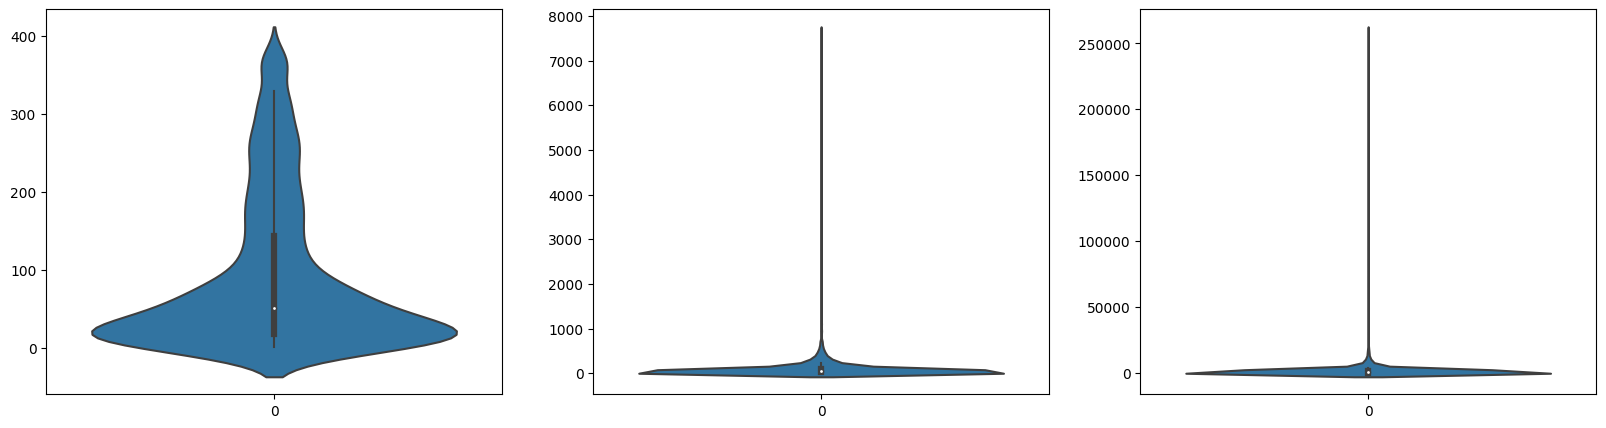

In [511]:
# checking for outliers
fig, axes = plt.subplots(1,3, figsize=(20,5))
sns.violinplot(rfm.Recency, ax = axes[0])
sns.violinplot(rfm.Frequency, ax = axes[1])
sns.violinplot(rfm.Monetary, ax = axes[2])


In [512]:
Q3 = rfm.Recency.quantile(0.90)
Q1 = rfm.Recency.quantile(0.10)
rfm["Recency"][rfm["Recency"]<=Q1] = Q1
rfm["Recency"][rfm["Recency"]>=Q3] = Q3

Q3 = rfm.Frequency.quantile(0.90)
Q1 = rfm.Frequency.quantile(0.10)
rfm['Frequency'][rfm["Frequency"]<=Q1] = Q1
rfm["Frequency"][rfm["Frequency"]>=Q3] = Q3

Q3 = rfm.Monetary.quantile(0.90)
Q1 = rfm.Monetary.quantile(0.10)
rfm['Monetary'][rfm["Monetary"]<=Q1] = Q1
rfm["Monetary"][rfm["Monetary"]>=Q3] = Q3

<Axes: >

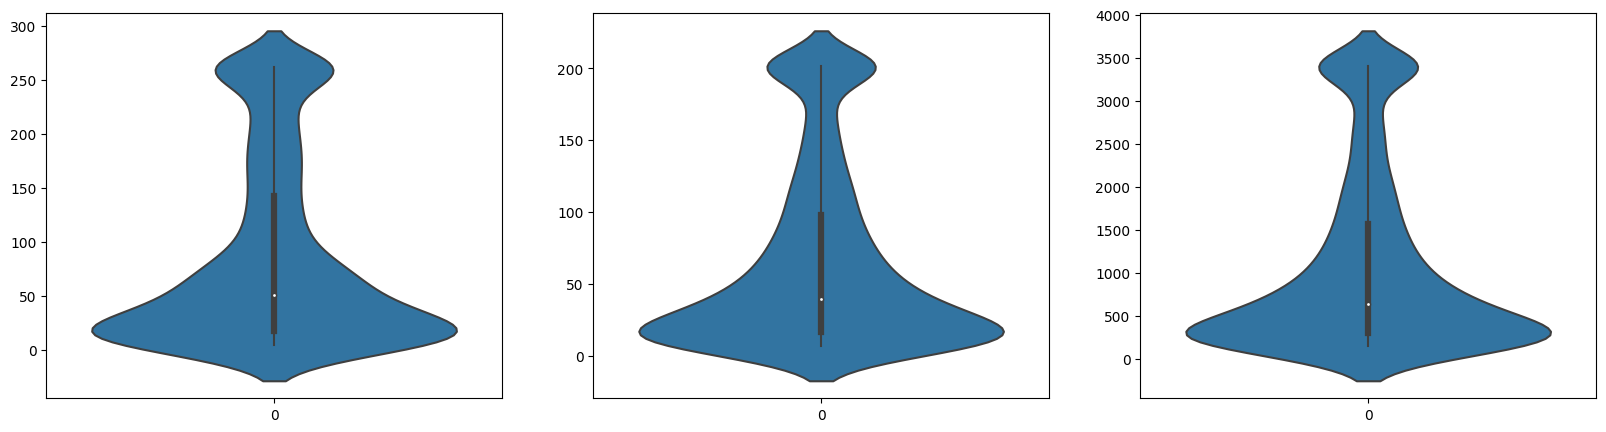

In [513]:
fig, axes = plt.subplots(1,3, figsize=(20,5))
sns.violinplot(rfm.Recency, ax = axes[0])
sns.violinplot(rfm.Frequency, ax = axes[1])
sns.violinplot(rfm.Monetary, ax = axes[2])


<Axes: >

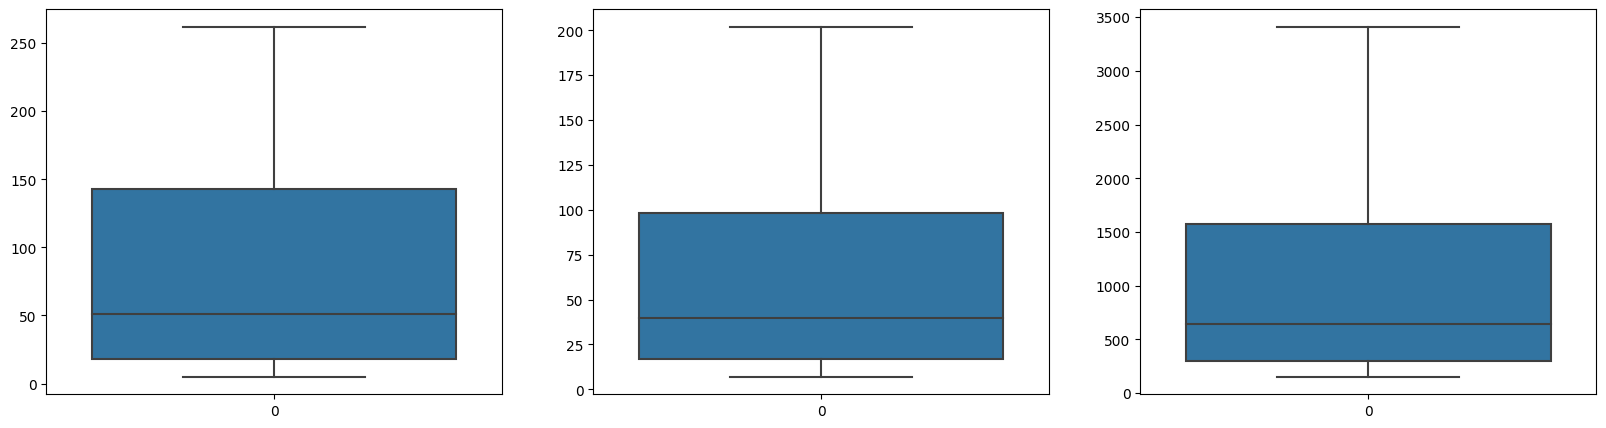

In [514]:
fig, axes = plt.subplots(1,3, figsize=(20,5))
sns.boxplot(rfm.Recency, ax = axes[0])
sns.boxplot(rfm.Frequency, ax = axes[1])
sns.boxplot(rfm.Monetary, ax = axes[2])

# the outliers have been removed

In [515]:
rfm_new = rfm[["Recency", "Frequency", "Monetary"]]
rfm_new

Recency  Frequency  Monetary
0         262          7  3410.912
1           5        103  3410.912
2           5        202  3410.912
3           5        199  3410.912
4           5         59   942.340
...       ...        ...       ...
3915      262         10   180.600
3916      181          7   152.200
3917        8         12   178.050
3918        5        202  2045.530
3919       43         70  1837.280

[3920 rows x 3 columns]

In [516]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [517]:
rfm_scaled = scaler.fit_transform(rfm_new)
rfm_scaled

array([[ 2.0012367 , -0.93498453,  2.19084654],
       [-0.94020069,  0.58223959,  2.19084654],
       [-0.94020069,  2.14687697,  2.19084654],
       ...,
       [-0.90586485, -0.85596244, -0.86738695],
       [-0.94020069,  2.14687697,  0.89921796],
       [-0.50527999,  0.0606938 ,  0.70221693]])

In [518]:
rfm_scaleddf = pd.DataFrame(rfm_scaled, columns=["Recency", "Frequency", "Monetary"])
rfm_scaleddf

Recency  Frequency  Monetary
0     2.001237  -0.934985  2.190847
1    -0.940201   0.582240  2.190847
2    -0.940201   2.146877  2.190847
3    -0.940201   2.099464  2.190847
4    -0.940201  -0.113155 -0.144381
...        ...        ...       ...
3915  2.001237  -0.887571 -0.864975
3916  1.074169  -0.934985 -0.891841
3917 -0.905865  -0.855962 -0.867387
3918 -0.940201   2.146877  0.899218
3919 -0.505280   0.060694  0.702217

[3920 rows x 3 columns]

In [519]:
from sklearn.cluster import KMeans

In [520]:
clusters = list(range(2,10))
ssd = []
for cluster in clusters:
  model = KMeans(n_clusters=cluster, max_iter=150, random_state=0)
  model.fit(rfm_scaleddf)
  ssd.append(model.inertia_)

ssd

[5726.280978834972,
 3059.4154596823046,
 2363.5896968823545,
 1968.288185535831,
 1682.5805571573783,
 1435.7865613565452,
 1304.2886870093478,
 1182.4206501778522]

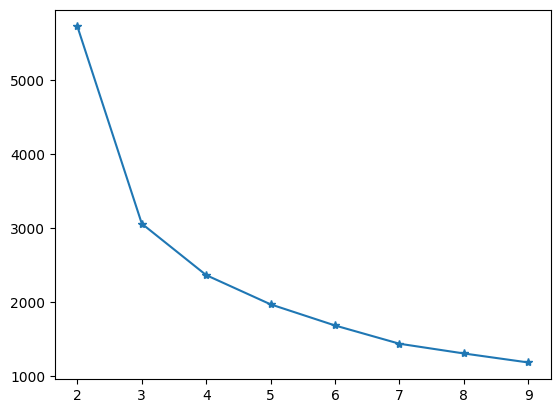

In [521]:
plt.plot(clusters,ssd, marker="*")

In [522]:
# from the elbow curve, k = 3

In [523]:
# calculating the silhouette score

In [524]:
from sklearn.metrics import silhouette_score

In [525]:
clusters = list(range(2,10))
sil_score = []
for cluster in clusters:
  model = KMeans(n_clusters=cluster, max_iter=150, random_state=64)
  model.fit(rfm_scaleddf)
  label = model.labels_
  silScore = silhouette_score(rfm_scaleddf, label)
  sil_score.append(silScore)
  print(f"for no of clusters = {cluster}, silhouette score is {silScore}")

for no of clusters = 2, silhouette score is 0.4896710586623568
for no of clusters = 3, silhouette score is 0.5068432422094249
for no of clusters = 4, silhouette score is 0.45535299341446134
for no of clusters = 5, silhouette score is 0.48719698140162293
for no of clusters = 6, silhouette score is 0.42490835968038404
for no of clusters = 7, silhouette score is 0.4091811484976841
for no of clusters = 8, silhouette score is 0.4034570100966397
for no of clusters = 9, silhouette score is 0.4120590523555772


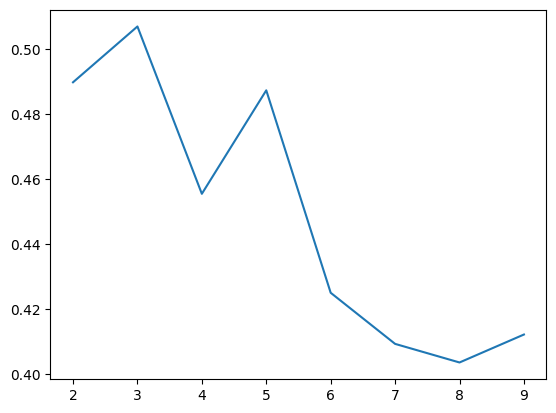

In [526]:
plt.plot(clusters, sil_score)

In [527]:
Kmeans_model = KMeans(n_clusters=3, max_iter=150, random_state=0)
Kmeans_model.fit(rfm_scaleddf)

KMeans(max_iter=150, n_clusters=3, random_state=0)

In [528]:
label = Kmeans_model.labels_
label

array([1, 0, 0, ..., 2, 0, 2], dtype=int32)

In [529]:
rfm["ClusterID"] = label
rfm

CustomerID  Recency  Frequency  Monetary  ClusterID
0          12346      262          7  3410.912          1
1          12747        5        103  3410.912          0
2          12748        5        202  3410.912          0
3          12749        5        199  3410.912          0
4          12820        5         59   942.340          2
...          ...      ...        ...       ...        ...
3915       18280      262         10   180.600          1
3916       18281      181          7   152.200          1
3917       18282        8         12   178.050          2
3918       18283        5        202  2045.530          0
3919       18287       43         70  1837.280          2

[3920 rows x 5 columns]

<Axes: xlabel='Recency', ylabel='Frequency'>

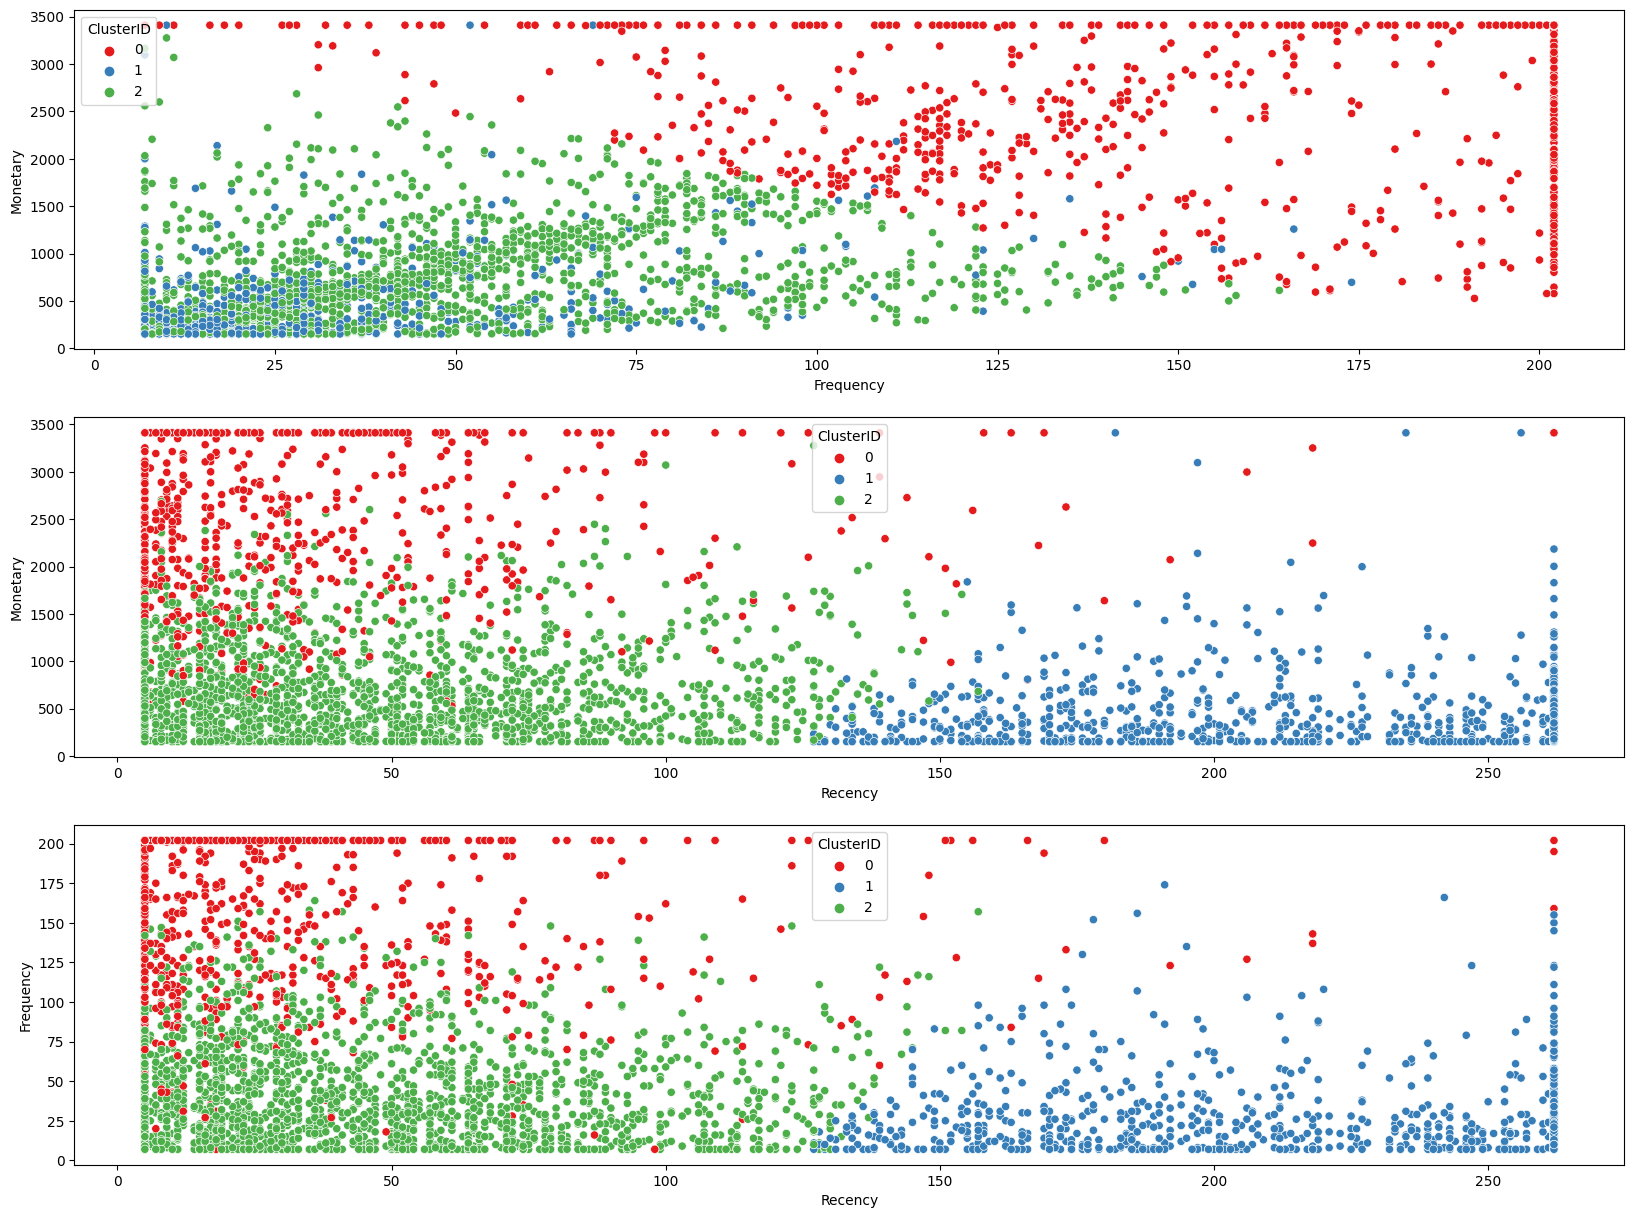

In [530]:
plt.figure(figsize=(20,15))

plt.subplot(3,1,1)
sns.scatterplot(x="Frequency", y="Monetary", data=rfm, hue="ClusterID", palette="Set1")

plt.subplot(3,1,2)
sns.scatterplot(x="Recency", y="Monetary", data=rfm, hue="ClusterID", palette="Set1")

plt.subplot(3,1,3)
sns.scatterplot(x="Recency", y="Frequency", data=rfm, hue="ClusterID", palette="Set1")

In [531]:
# when no of clusters, k = 3,
# from the first plot, the customer belonging to cluster 0 are the most frequent customers
# and so they are the ones who spend large amount of money
# whereas cluster 1 people are the less frequent ones. They might probably stop buying after some time
# customers belonging to cluster 3 are not as frequent as cluster 0 and the amount they spend is also less
# so some marketing stategies on such people might turn them into a frequent customers making them spend more on the items

In [532]:
# from plot2, cluster 0 have less recency and they spend large amounts as well ie, they are the frequent or valuable customers
# cluster 1 has large recency ie, they purchase items occasionally

In [533]:
# from plot 3 as well, it is evident that cluster 0 have least recency and are the most frequent ones

In [534]:
# from the above clulstering, it is clear that customers belonging to cluster 0 are the most frequent and valuable customers
# customers belonging to cluster 1 are the least frequent purchasers so may be targeting them on the basis of items they purchase
# can turn them from least spenders to atleast an average spender
# customers belonging to cluster 2 needs to be focused mainly. They are on the border line as you can either lose or retain those people
# so implementing marketing strategies on such targeted customers, recommending them with products on the basis of their purchase patterns,
# giving more offers and discounts can help to make them frequent or valuable customers

In [535]:
# based on silhouette score, when k is taken as 6

In [536]:
model2 = KMeans(n_clusters=6, max_iter=150, random_state=0).fit(rfm_scaleddf)

In [537]:
label2 = model2.labels_

In [538]:
rfm["Clus2"] = label2

<Axes: xlabel='Recency', ylabel='Frequency'>

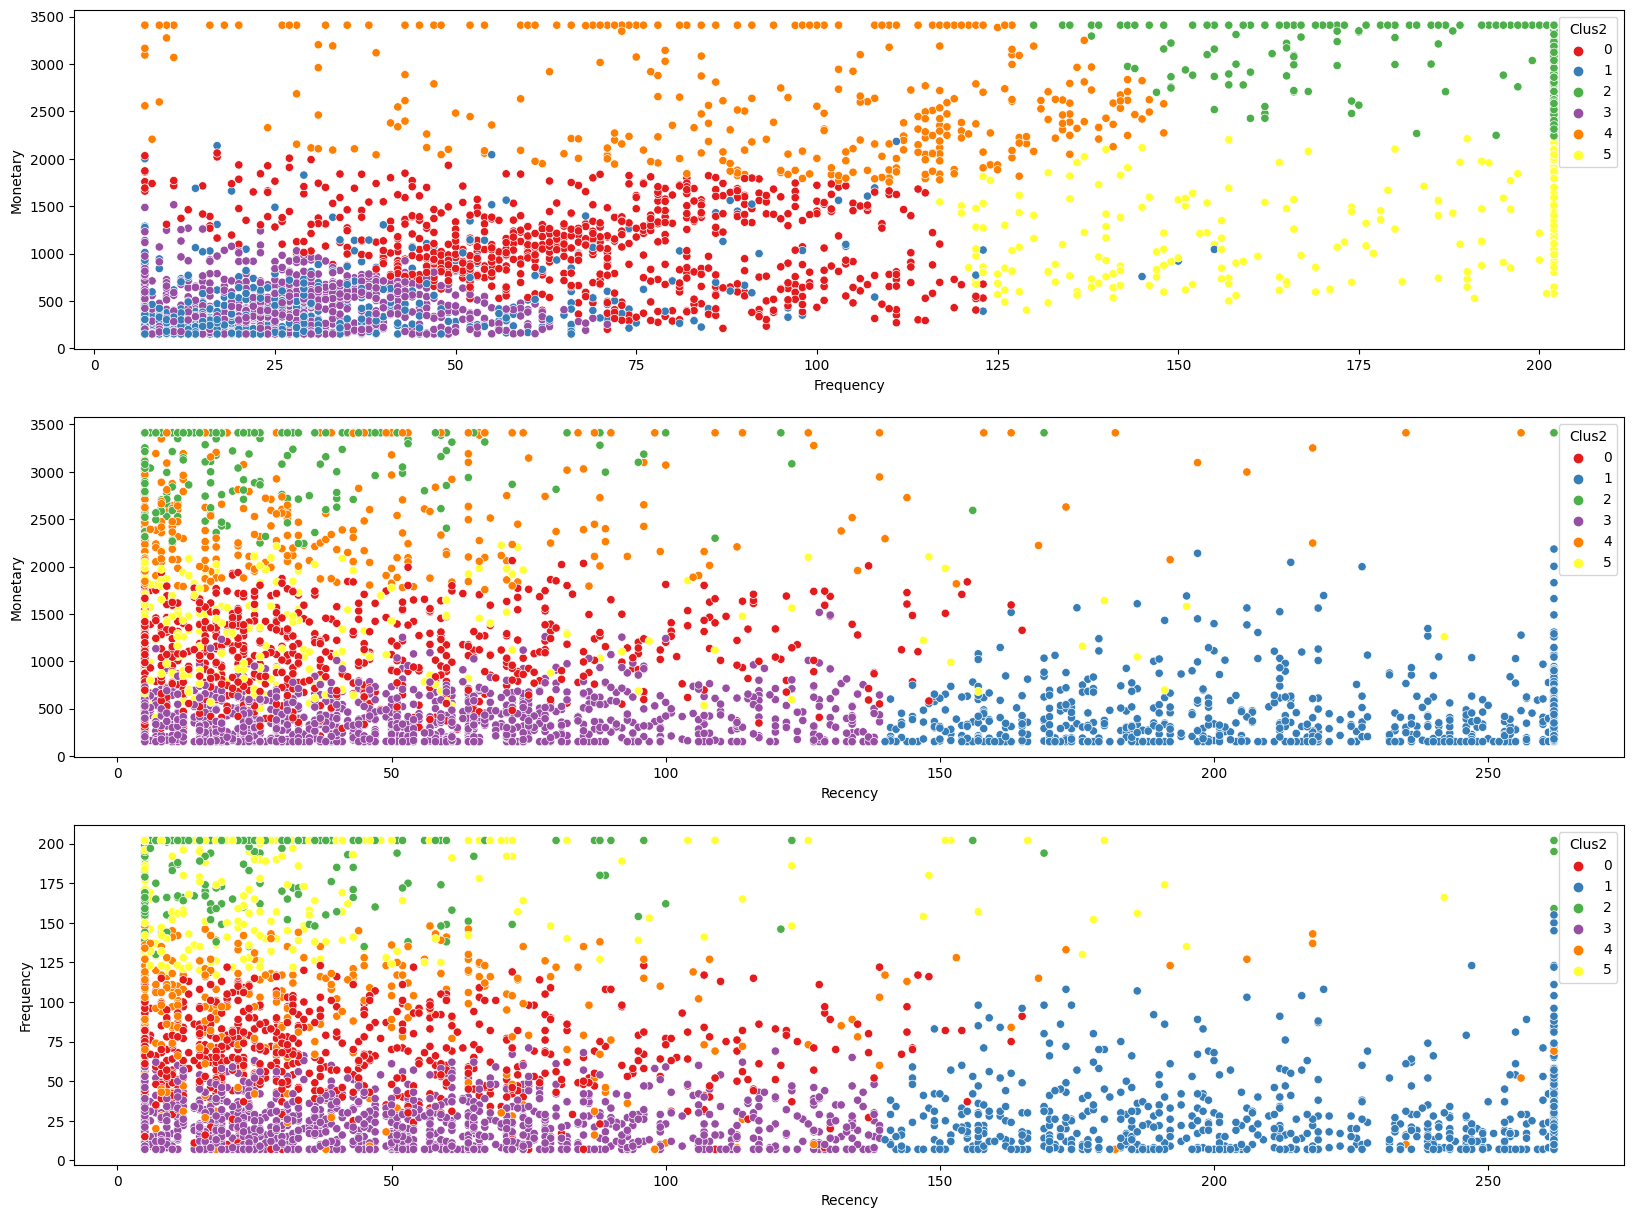

In [539]:
plt.figure(figsize=(20,15))

plt.subplot(3,1,1)
sns.scatterplot(x="Frequency", y="Monetary", data=rfm, hue="Clus2", palette="Set1")

plt.subplot(3,1,2)
sns.scatterplot(x="Recency", y="Monetary", data=rfm, hue="Clus2", palette="Set1")

plt.subplot(3,1,3)
sns.scatterplot(x="Recency", y="Frequency", data=rfm, hue="Clus2", palette="Set1")

In [540]:
# if we increase the no. of clusters, the segregation of customers becomes more clear
# from the plots, cluster 2 customers are the most valuable ones, spending the most and being the most frequent ones
# cluster 5 are frequent ones but spend less amount compared to cluster 2
# clusters 1 and 3 are the least spenders with cluster 1 having the maximum recency ie, they rarely purchase items from the stores
# cluster 4 spend large amounts even though they are not as frequent as cluster 2 and 5
# focussing majorly on cluster 0 and 4 can increase the sales of items

In [541]:
# Hence KMeans clustering helps to cluster/segregate people on the basis of their past purchasing behavoiur,how frequent they are,
# how much they are spending, etc.
# It helps companies to implement targeted marketing strategies on each of the clusters so as they focus on each clusters separately
# and convert them into valuable customers as well as increase their sales

In [542]:
# Hierarchial Clustering (here k need not be specified)

In [543]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

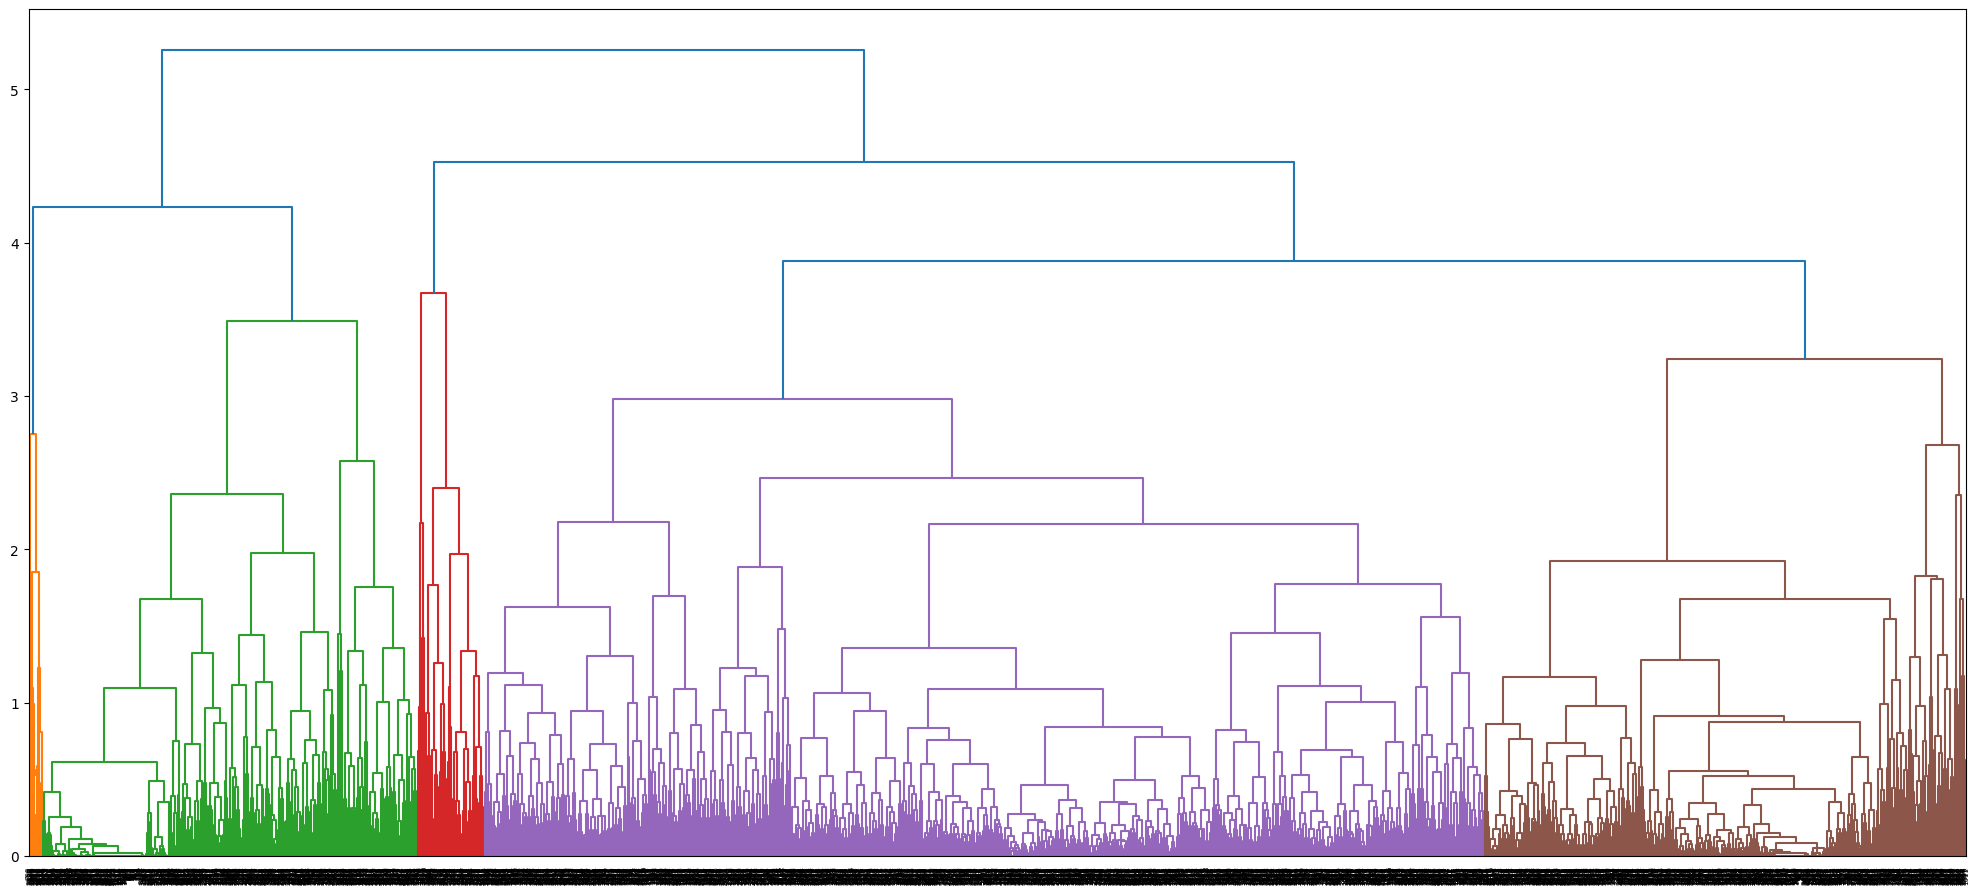

In [544]:
plt.figure(figsize=(25,11))
mergings = linkage(rfm_scaleddf, method="complete", metric="euclidean")
dendrogram(mergings)
plt.show()

In [545]:
from scipy.cluster.hierarchy import cut_tree

In [546]:
clus_labels = cut_tree(mergings, n_clusters=3).reshape(-1,)
clus_labels

array([0, 0, 1, ..., 2, 1, 2])

In [547]:
rfm_hc = rfm.copy()
rfm_hc.drop(["ClusterID", "Clus2"], axis=1, inplace=True)
rfm_hc

CustomerID  Recency  Frequency  Monetary
0          12346      262          7  3410.912
1          12747        5        103  3410.912
2          12748        5        202  3410.912
3          12749        5        199  3410.912
4          12820        5         59   942.340
...          ...      ...        ...       ...
3915       18280      262         10   180.600
3916       18281      181          7   152.200
3917       18282        8         12   178.050
3918       18283        5        202  2045.530
3919       18287       43         70  1837.280

[3920 rows x 4 columns]

In [548]:
rfm_hc["Labels"] = clus_labels
rfm_hc.head()

CustomerID  Recency  Frequency  Monetary  Labels
0       12346      262          7  3410.912       0
1       12747        5        103  3410.912       0
2       12748        5        202  3410.912       1
3       12749        5        199  3410.912       1
4       12820        5         59   942.340       2

<Axes: xlabel='Recency', ylabel='Frequency'>

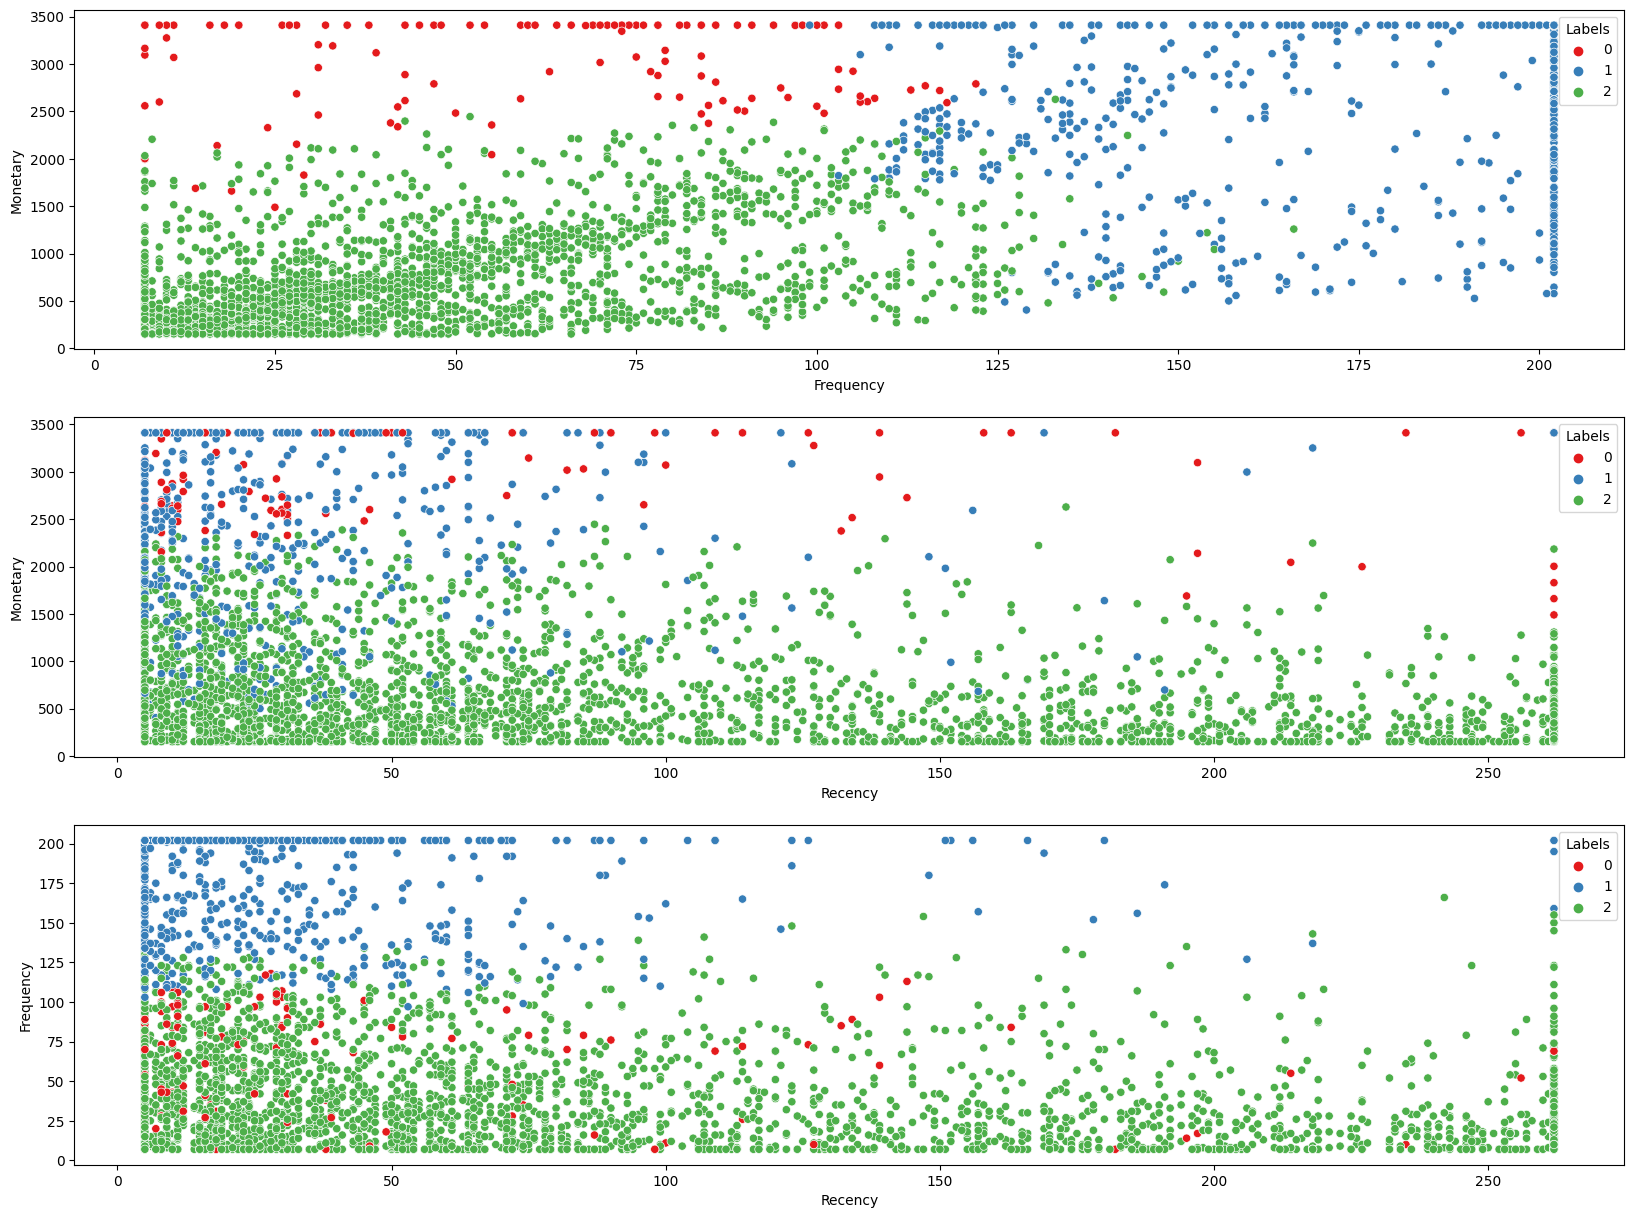

In [549]:
plt.figure(figsize=(20,15))

plt.subplot(3,1,1)
sns.scatterplot(x="Frequency", y="Monetary", data=rfm_hc, hue="Labels", palette="Set1")

plt.subplot(3,1,2)
sns.scatterplot(x="Recency", y="Monetary", data=rfm_hc, hue="Labels", palette="Set1")

plt.subplot(3,1,3)
sns.scatterplot(x="Recency", y="Frequency", data=rfm_hc, hue="Labels", palette="Set1")

In [550]:
#  as per hierarchial clustering, people belonging to cluster 1 are the most frequent ones and who spends a lot of money
# whereas people belonging to cluster 2 are the least frequent ones